# House Prices: Advanced Regression Techniques

### Description of the dataset
The data has been split into two groups:
- training set (train.csv) : SalePrice(response variable) with 79 explanatory variables
- test set (test.csv)

For detailed data description, check https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

### The Objective
My goal is to predict the final price of each home using (almost) every aspect of residential homes in Ames, Iowa.

# Table of Contents
### [1.Checking Ordinality](#Checking-Ordinality)
- [Overall Quality and Conditions](#Overall-Quality-and-Conditions)
- [Basement Related Variables](#Basement-Related-Variables)
- [Exterior Related Variables](#Exterior-Related-Variables)
- [Garage Related Variables](#Garage-Related-Variables)
- [Heating & AC Related Variables](#Heating-&-AC-Related-Variables)
- [Lot Related Variables](#Lot-Related-Variables)
- [Roof Related Variables](#Roof-Related-Variables)
- [Sale Related Variables](#Sale-Related-Variables)
- [Land Related Variables](#Land-Related-Variables)
- [Time Related Variables](#Time-Related-Variables)
- [Other Variables 1](#Other-Variables-1)
- [Other Variables 2](#Other-Variables-2)
- [Other Variables 3](#Other-Variables-3)
- [Other Variables 4](#Other-Variables-4)
- [Other Variables 5](#Other-Variables-5)

### [2. Explanatory Data Analysis and Feature Engineering](#Explanatory-Data Analysis-and-Feature-Engineering)
- [Correlation Pairplot](#Correlation-Pairplot)
- [Exploring Related Variables](#Exploring-Related-Variables)
    * [House Size Variables](#House-Size-Variables)
    * [Bathroom Variables](#Bathroom-Variables)
    * [Porch Variables](#Porch-Variables)
    * [Time Variables](#Time-Variables)
    * [Neighborhood](#Neighborhood)
    * [Pool](#Pool)

In [1]:
%matplotlib inline  
%config InlineBackend.figure_format='retina'

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
# Import Dataset
train_set = pd.read_csv('train(cleaned).csv')
test_set = pd.read_csv('test(cleaned).csv')

In [3]:
train_set.shape,test_set.shape

((1460, 80), (1459, 79))

In [4]:
# Save 'Id' column
train_ID, test_ID = train_set['Id'], test_set['Id']

# Dropping 'Id' colum since it's unnecessary at the moment
train_set.drop("Id", axis = 1, inplace = True)
test_set.drop("Id", axis = 1, inplace = True)

In [5]:
ntrain = len(train_set)

# store response variable
y_train = train_set.SalePrice

# combining training and testing dataset
combined = pd.concat([train_set, test_set]).drop(['SalePrice'], axis=1).reset_index(drop=True)

print('Dimension of combined dataset is {}'.format(combined.shape))

Dimension of combined dataset is (2919, 78)


In [6]:
# Categorical Variables recorded as integers
numToObjVar = ['OverallQual','OverallCond','GarageYrBlt',
               'YearBuilt','YearRemodAdd','YrSold', 'MoSold', 'MSSubClass']
combined.loc[:,numToObjVar] = combined.loc[:,numToObjVar].astype('object')

In [7]:
# separate categorical and numerical variables
categorical = []
numerical = []
for var in combined.columns:
    if combined[var].dtype == 'object':
        categorical.append(var)
    else:
        numerical.append(var)

In [8]:
# For drawing multiple bar plots to check ordinality
def multiplePlots(vector):
    plt.subplots(figsize=(15,5))
    for i in range(len(vector)):
        plt.subplot(1, len(vector),i+1)
        sns.barplot(combined[vector[i]], y_train, data = combined, ci = False)
        plt.xlabel(vector[i])
        plt.ylabel('Sales Price')
        plt.title('Sales Price by {}'.format(vector[i]), fontsize = 12)
        plt.xticks(rotation = 30)
        plt.tight_layout()

# Checking Ordinality
In order to check potential ordinality in categorical variables, I will divide them into multiple subsets and visualize their relationships with `SalePrice`. 

In [9]:
overallVar = ['OverallQual', 'OverallCond'] #Overall Evaluations of House
bsmtVar = ['BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual'] # Basement Related Variables
exterVar = ['ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd',] # Exterior Related Variables
garageVar = ['GarageCond', 'GarageFinish', 'GarageQual', 'GarageType'] # Garage Related Variables
heat_ac_Var = ['Heating','HeatingQC', 'CentralAir'] # Heating & A/C Related Variables
lotVar = ['LotConfig', 'LotShape'] # Lot Related Variables
roofVar = ['RoofMatl', 'RoofStyle'] # Roof Related Variables
saleVar = ['SaleCondition', 'SaleType'] # Sale Related Variables
landVar = ['LandContour', 'LandSlope'] # Land Related Variables
timeVars1 = ['YearBuilt','YearRemodAdd', 'GarageYrBlt'] # Time Variables
timeVars2 = ['MoSold','YrSold'] # Time Variables
others1 = ['Alley', 'Fence', 'PavedDrive', 'Electrical'] # Other Group 1
others2 = ['PoolQC', 'Condition1', 'Condition2', 'FireplaceQu'] # Other Group 2
others3 = ['Functional','HouseStyle', 'KitchenQual', 'MiscFeature'] # Other Group 3
others4 = ['Neighborhood', 'BldgType', 'Foundation', 'Street'] # Other Group 4
others5 = ['MSSubClass', 'MSZoning', 'MasVnrType'] # Other Group 5

### Overall Quality and Conditions

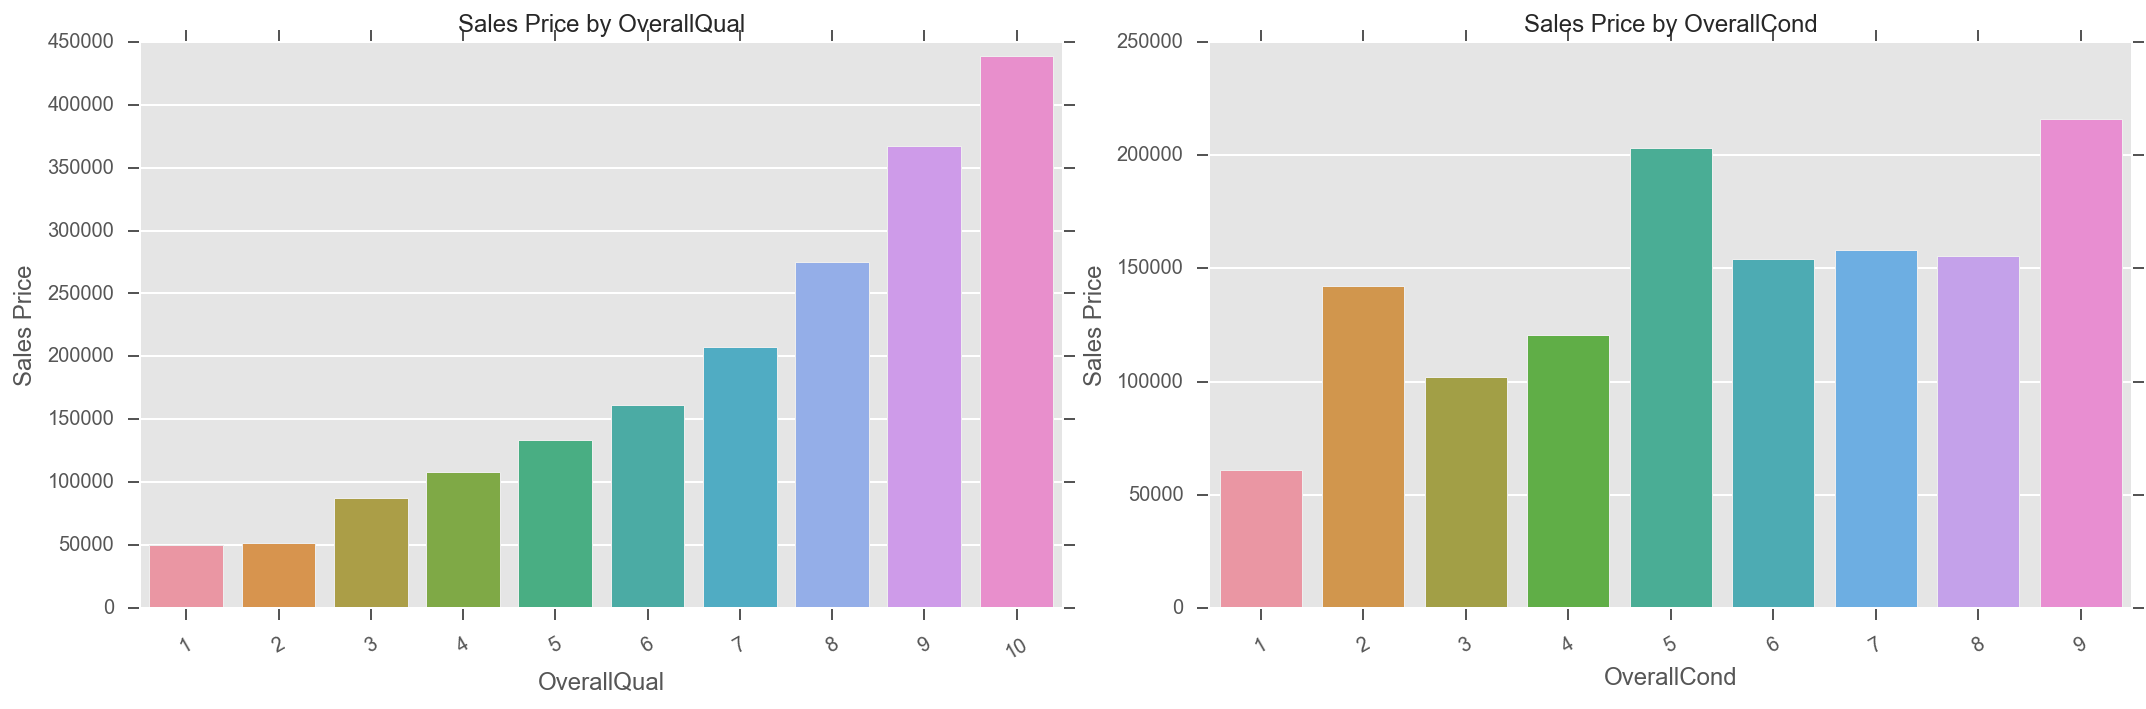

In [10]:
multiplePlots(overallVar)

`OverallQual`ity of a house and `SalePrice` do have a discernible pattern. The higher the overall quality of a house is, the higher the price is. Looking at the righthand barplot, `OverallCond`ition of a house and `SalePrice` are positively correlated. However, it turned out that `OverallCond`ition of a house and `SalePrice` are barely correlated. So, I will transform `OverallQual` to ordered numbers but leave `OverallCond` as it is for now.

In [11]:
pd.DataFrame({'SalePrice': y_train, 'Quality': train_set.OverallQual.astype('int'), 
              'Condition' : train_set.OverallCond.astype('int')}).corr()

,Condition,Quality,SalePrice
Condition,1.000000,-0.091932,-0.077856
Quality,-0.091932,1.000000,0.790982
SalePrice,-0.077856,0.790982,1.000000


In [12]:
combined.OverallQual = combined.OverallQual.astype('int')

### Basement Related Variables
It seems like all of the basement related variables are ordinal. I will transform categories into ordered numbers.

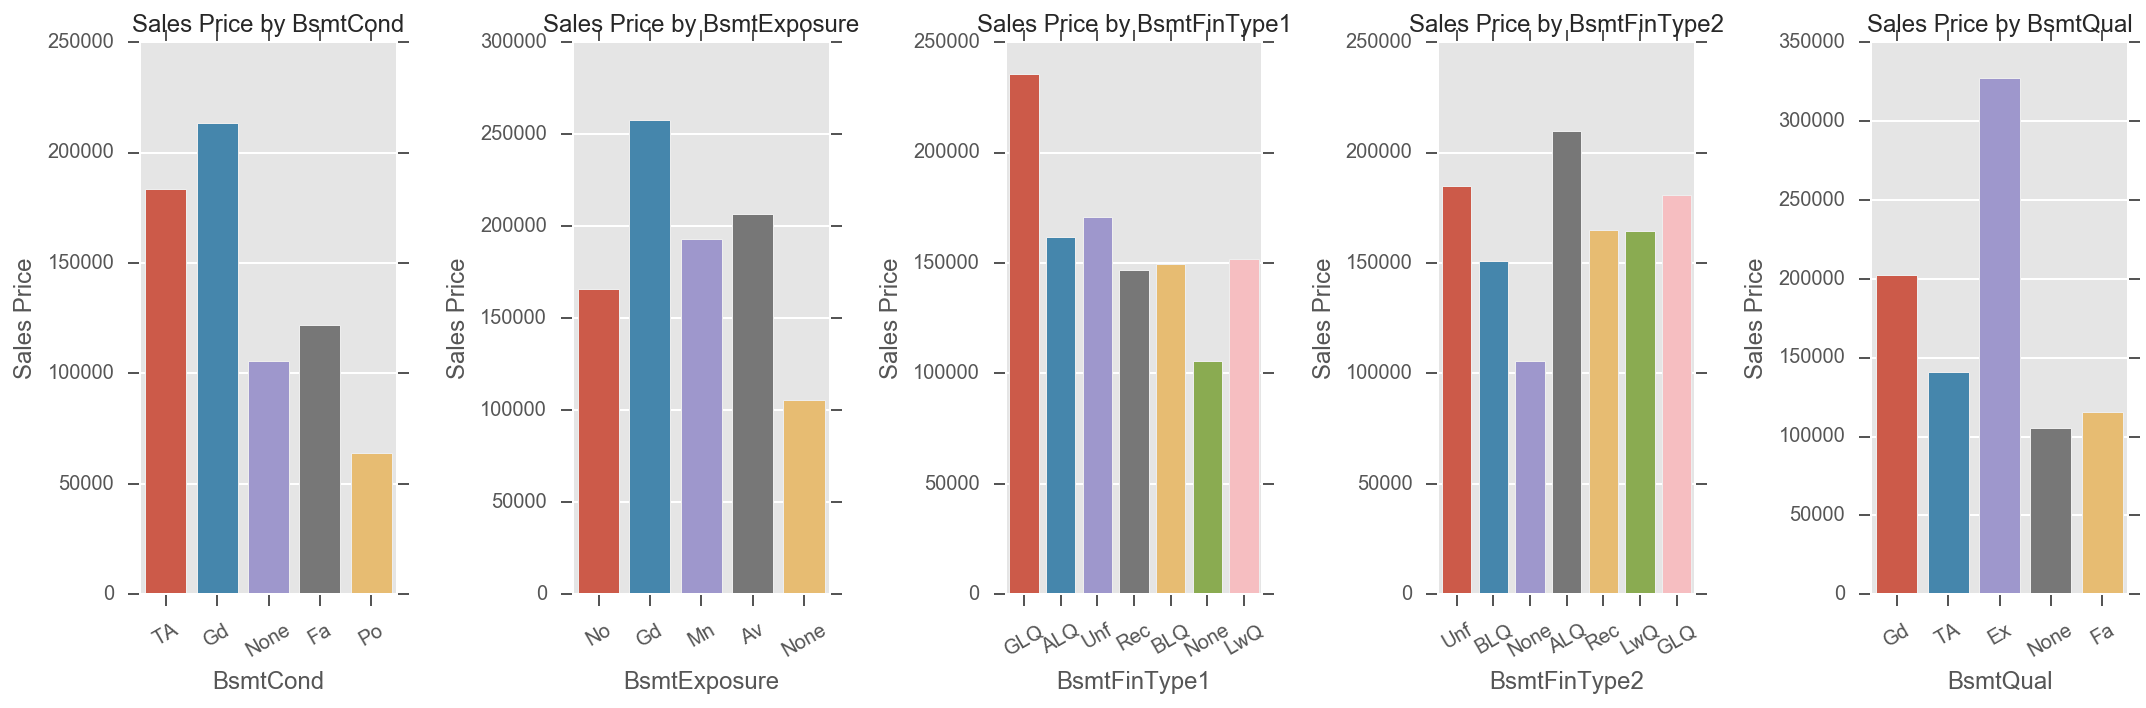

In [13]:
multiplePlots(bsmtVar)

In [14]:
combined.BsmtQual.replace({'None' : 0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5}, inplace = True)
combined.BsmtCond.replace({'None' : 0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5}, inplace = True)
combined.BsmtExposure.replace({'None' : 0, 'No' : 1, 'Mn' : 2, 'Av' : 3, 'Gd' : 4}, inplace = True)
combined.BsmtFinType1.replace({'None' : 0, 'Unf' : 1, 'LwQ' : 2, 'Rec' : 3, 'BLQ' : 4, 'ALQ' : 5, 'GLQ' : 6}, inplace = True)
combined.BsmtFinType2.replace({'None' : 0, 'Unf' : 1, 'LwQ' : 2, 'Rec' : 3, 'BLQ' : 4, 'ALQ' : 5, 'GLQ' : 6}, inplace = True)

### Exterior Related Variables
`ExterCond`, and `ExterQual` seems to be ordinal. I will make necessary change in those two. 

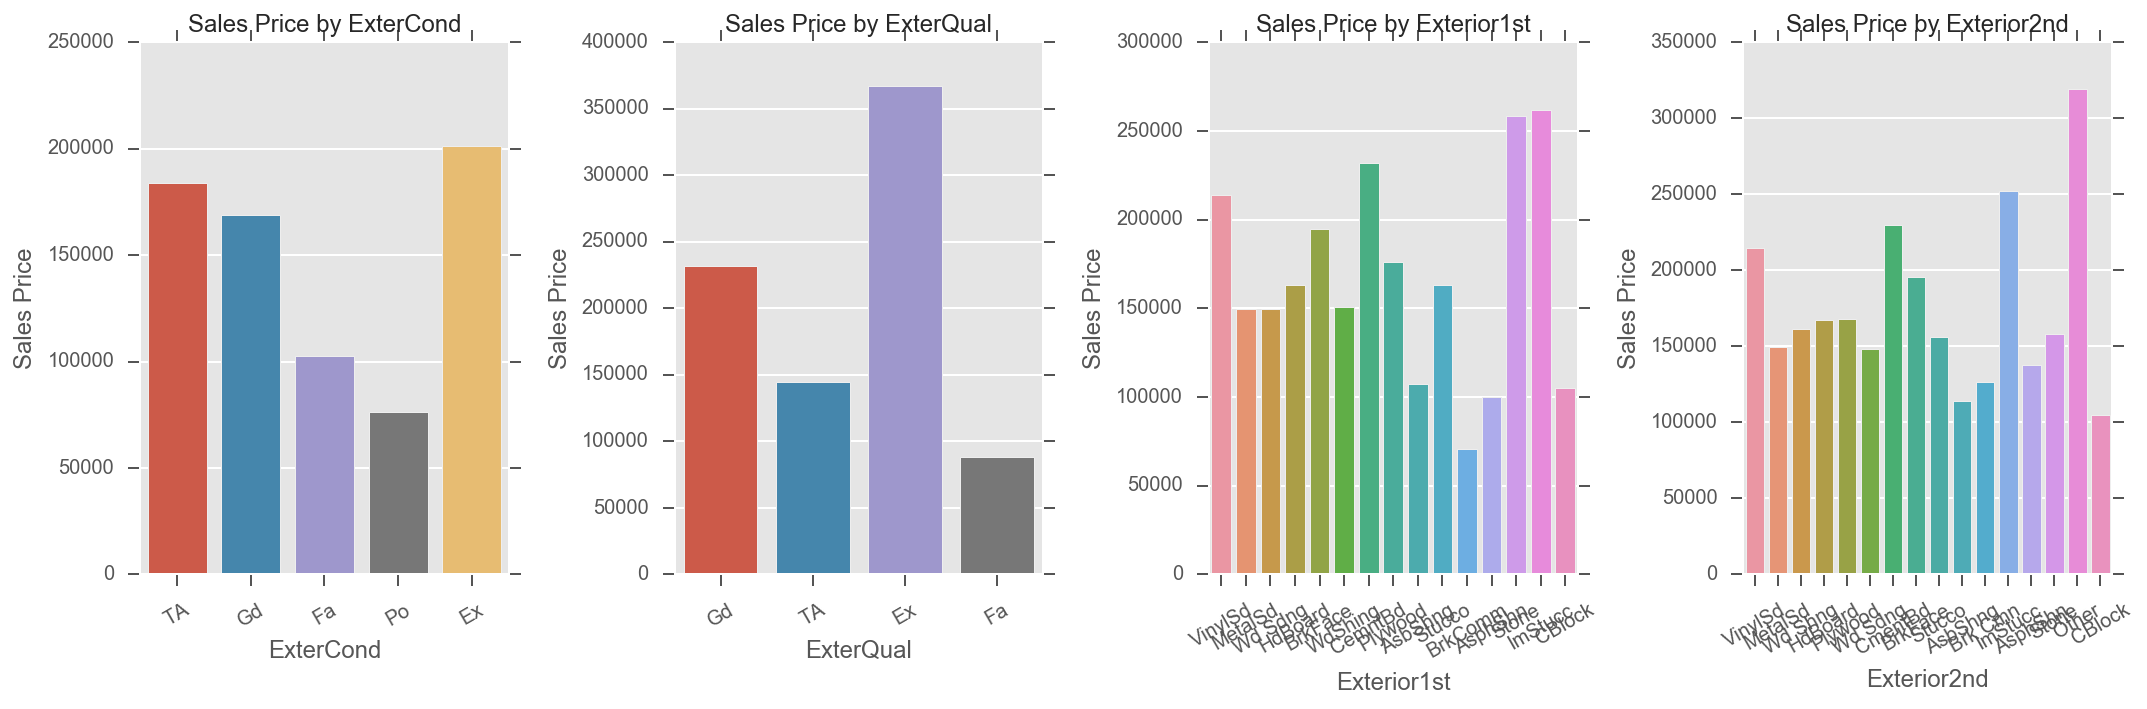

In [15]:
multiplePlots(exterVar)

In [16]:
combined.ExterCond.replace({'Po' : 0, 'Fa' : 1, 'TA' : 2, 'Gd' : 3, 'Ex' : 4}, inplace = True)
combined.ExterQual.replace({'Po' : 0, 'Fa' : 1, 'TA' : 2, 'Gd' : 3, 'Ex' : 4}, inplace = True)

### Garage Related Variables
`GarageQual`, `GarageCond`, and `GarageFinish` seems to be ordinal.

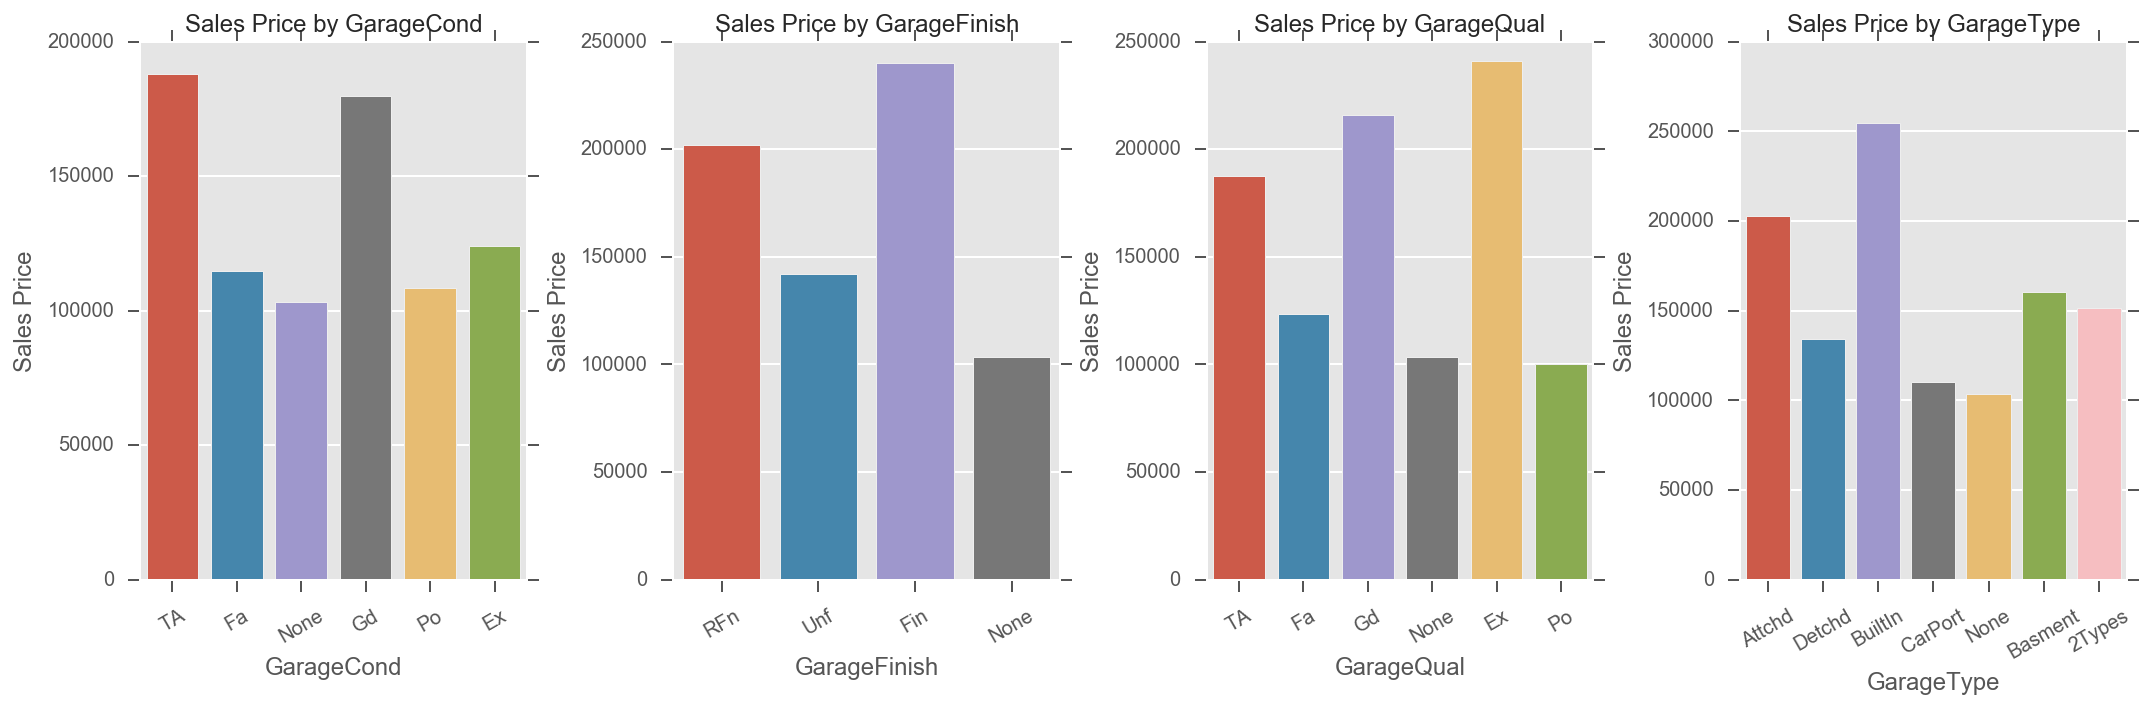

In [17]:
multiplePlots(garageVar)

In [18]:
combined.GarageQual.replace({'None' : 0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5}, inplace = True)
combined.GarageCond.replace({'None' : 0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5}, inplace = True)
combined.GarageFinish.replace({'None' : 0, 'Unf' : 1, 'RFn' : 2, 'Fin' : 3}, inplace = True)

### Heating & AC Related Variables
`HeatingQC` seems to be ordinal.

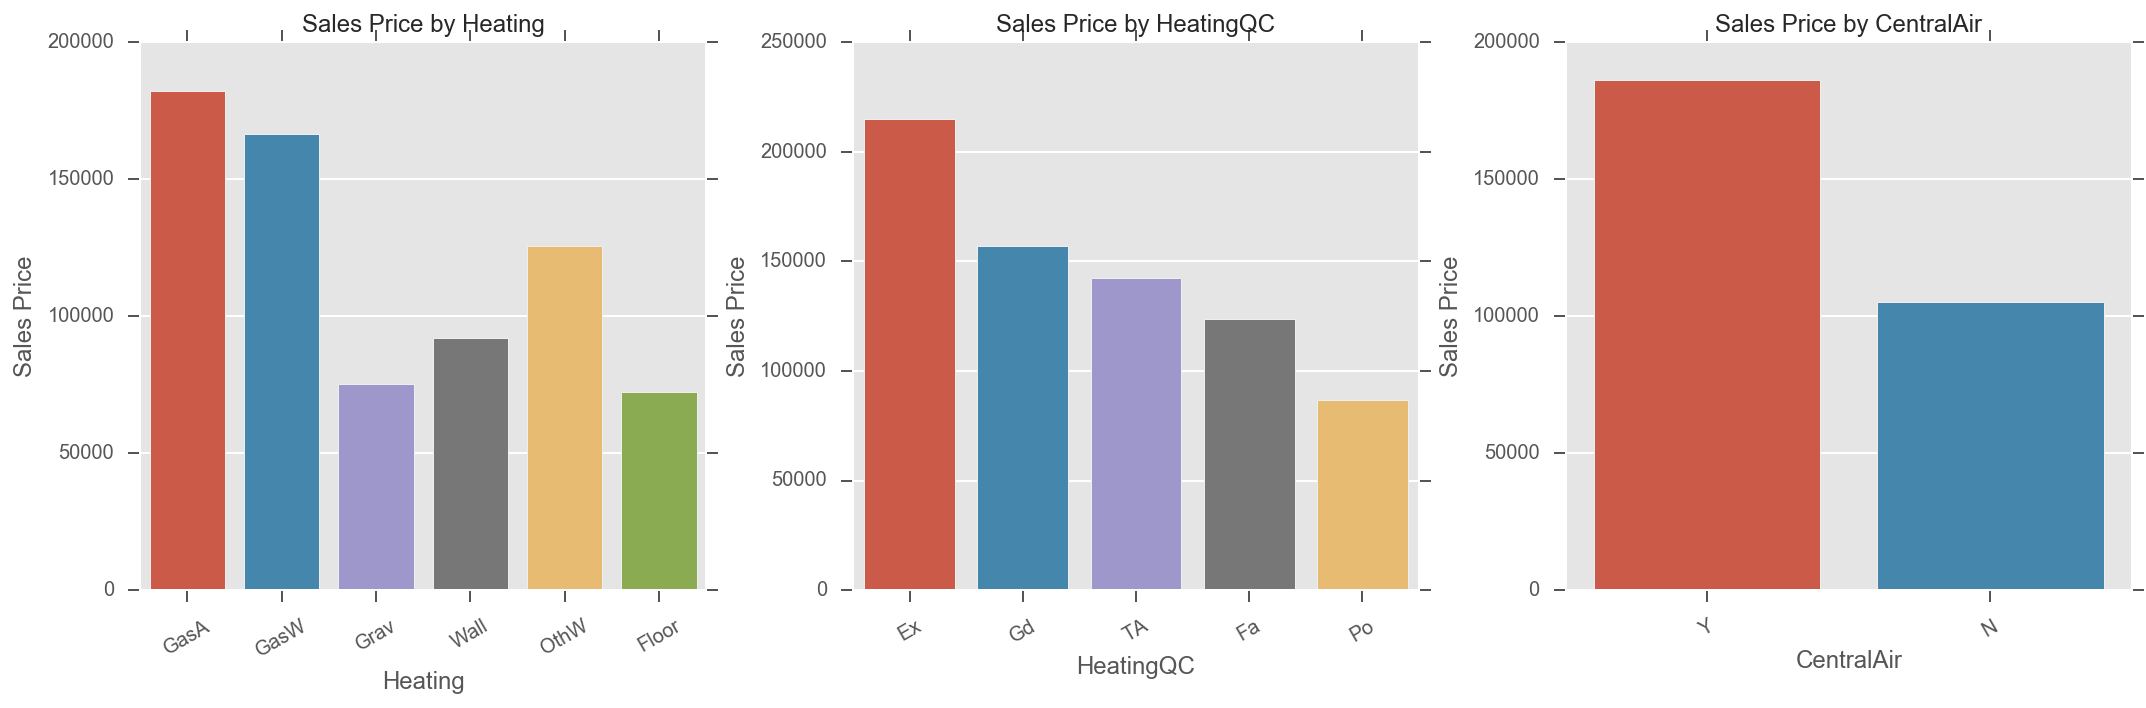

In [19]:
multiplePlots(heat_ac_Var)

In [20]:
combined.HeatingQC.replace({'Po' : 0, 'Fa' : 1, 'TA' : 2, 'Gd' : 3, 'Ex' : 4}, inplace = True)

### Lot Related Variables
`LotShape` seems to be ordinal but `LotConfig` doesn't. So, I will switch `LotShape` into ordered numbers. Even though the barplot show that sales price is higher for irregular lot shape, I will assume regular lot shape to be superior to irregular ones. (it makes more sense to me..?)

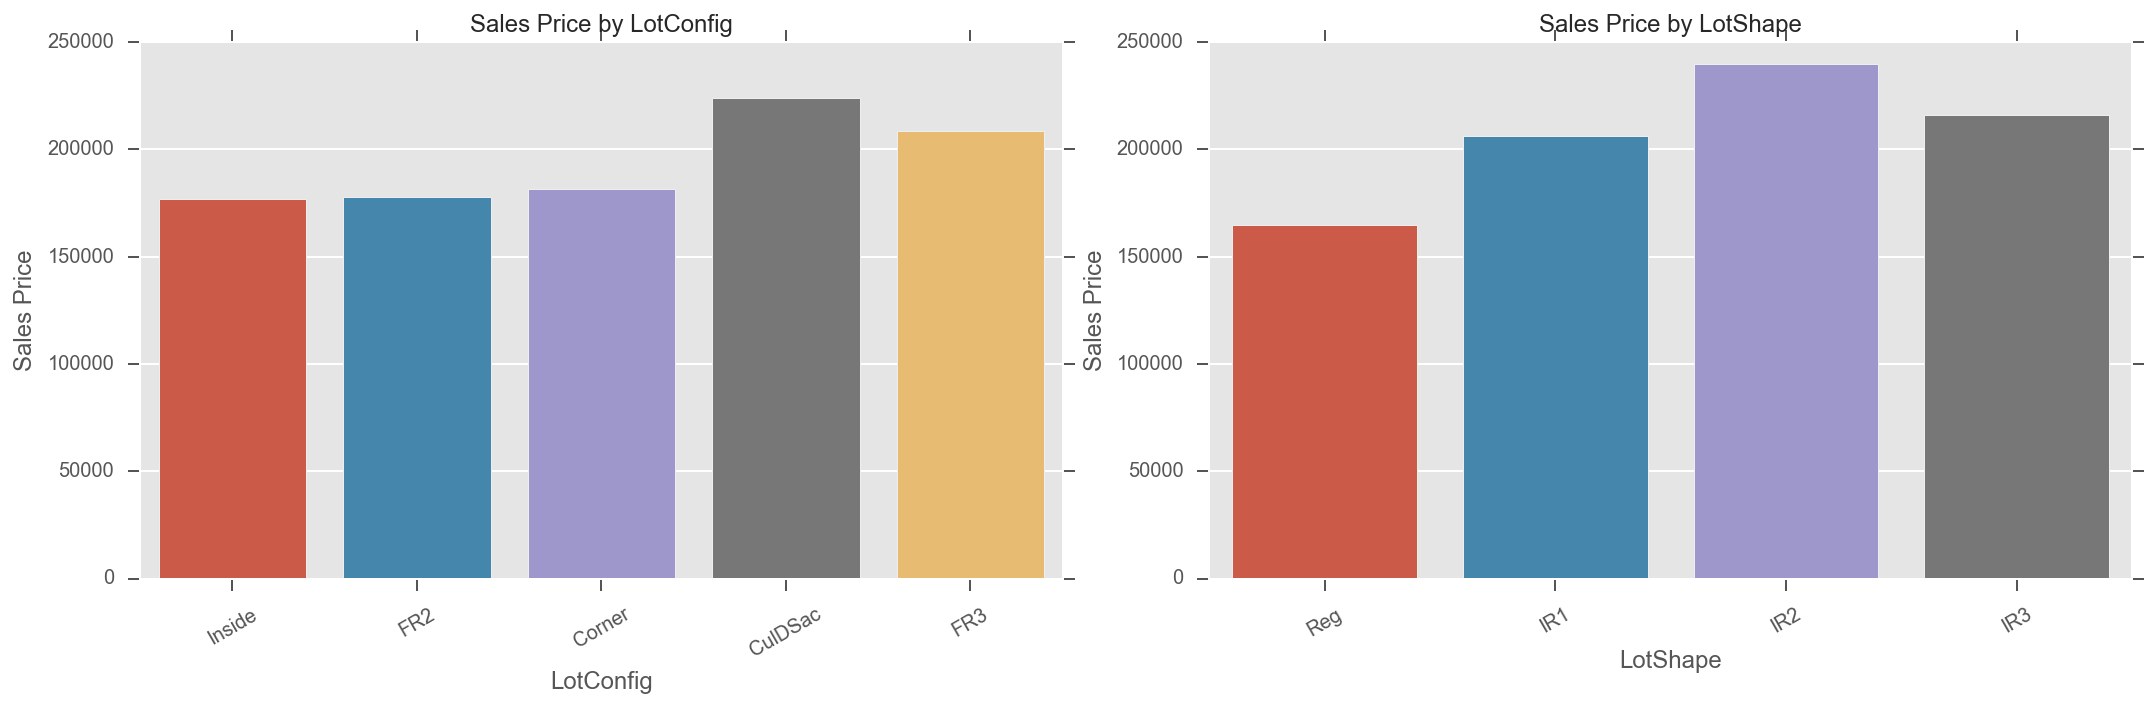

In [21]:
multiplePlots(lotVar)

In [22]:
combined.LotShape.replace({'IR3' : 0,'IR2' : 1, 'IR1' : 2, 'Reg' : 3}, inplace = True)

### Roof Related Variables
None of the roof related variables seems to be ordinal. I will leave it as it is. 

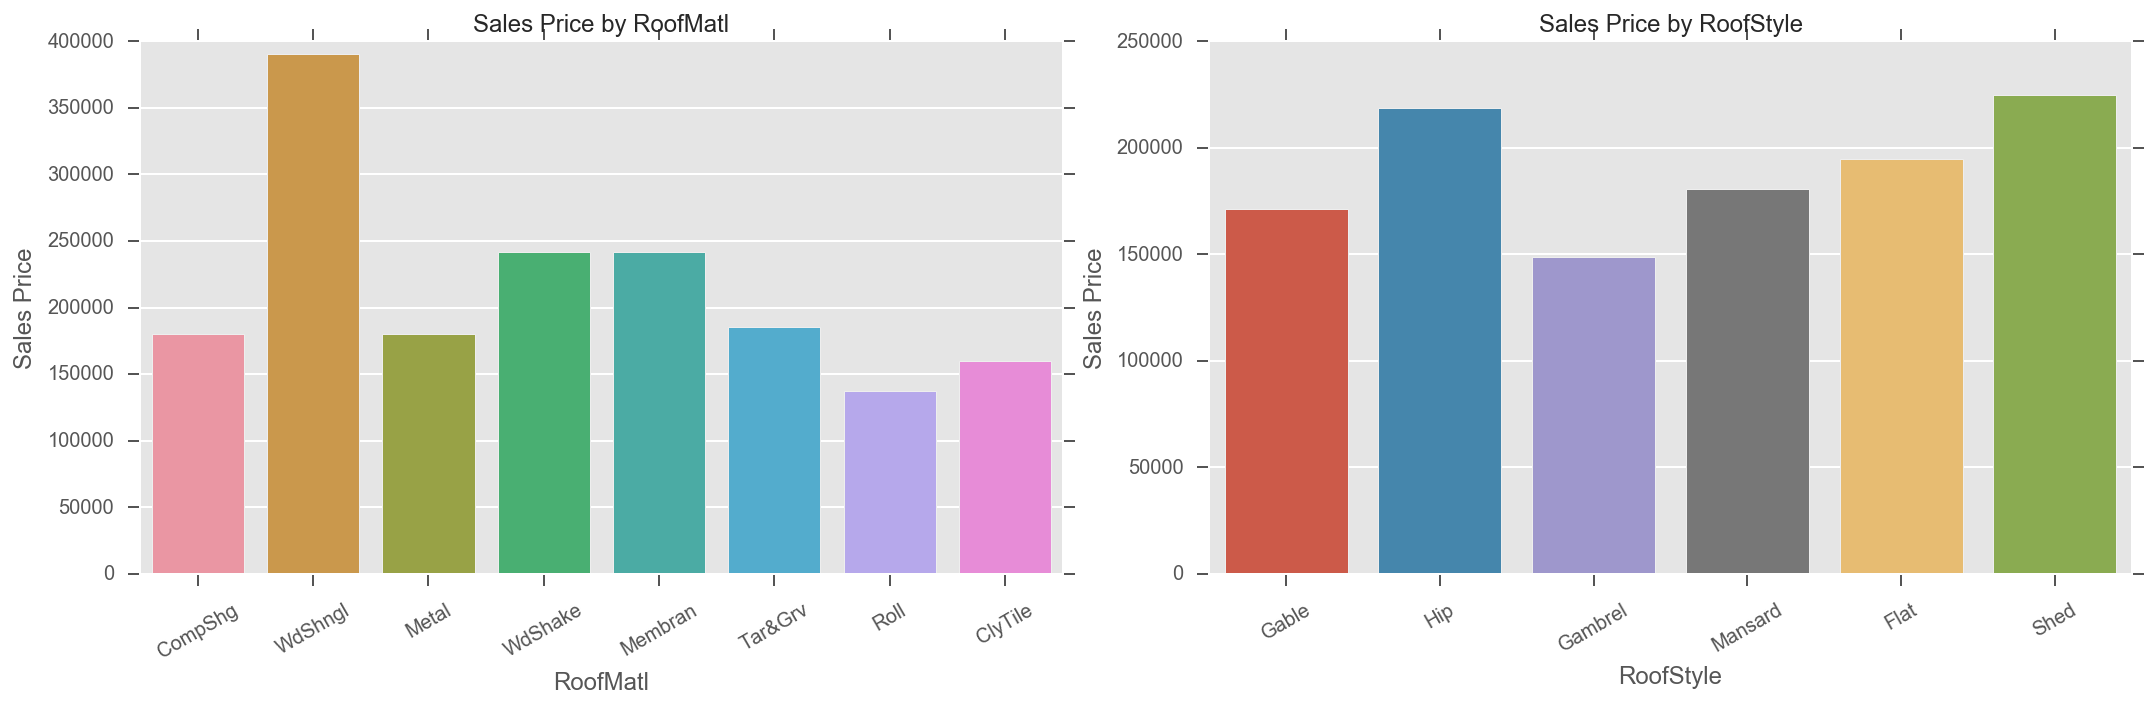

In [23]:
multiplePlots(roofVar)

### Sale Related Variables
None of the Sale related variables seems to be ordinal. I will leave it as it is. 

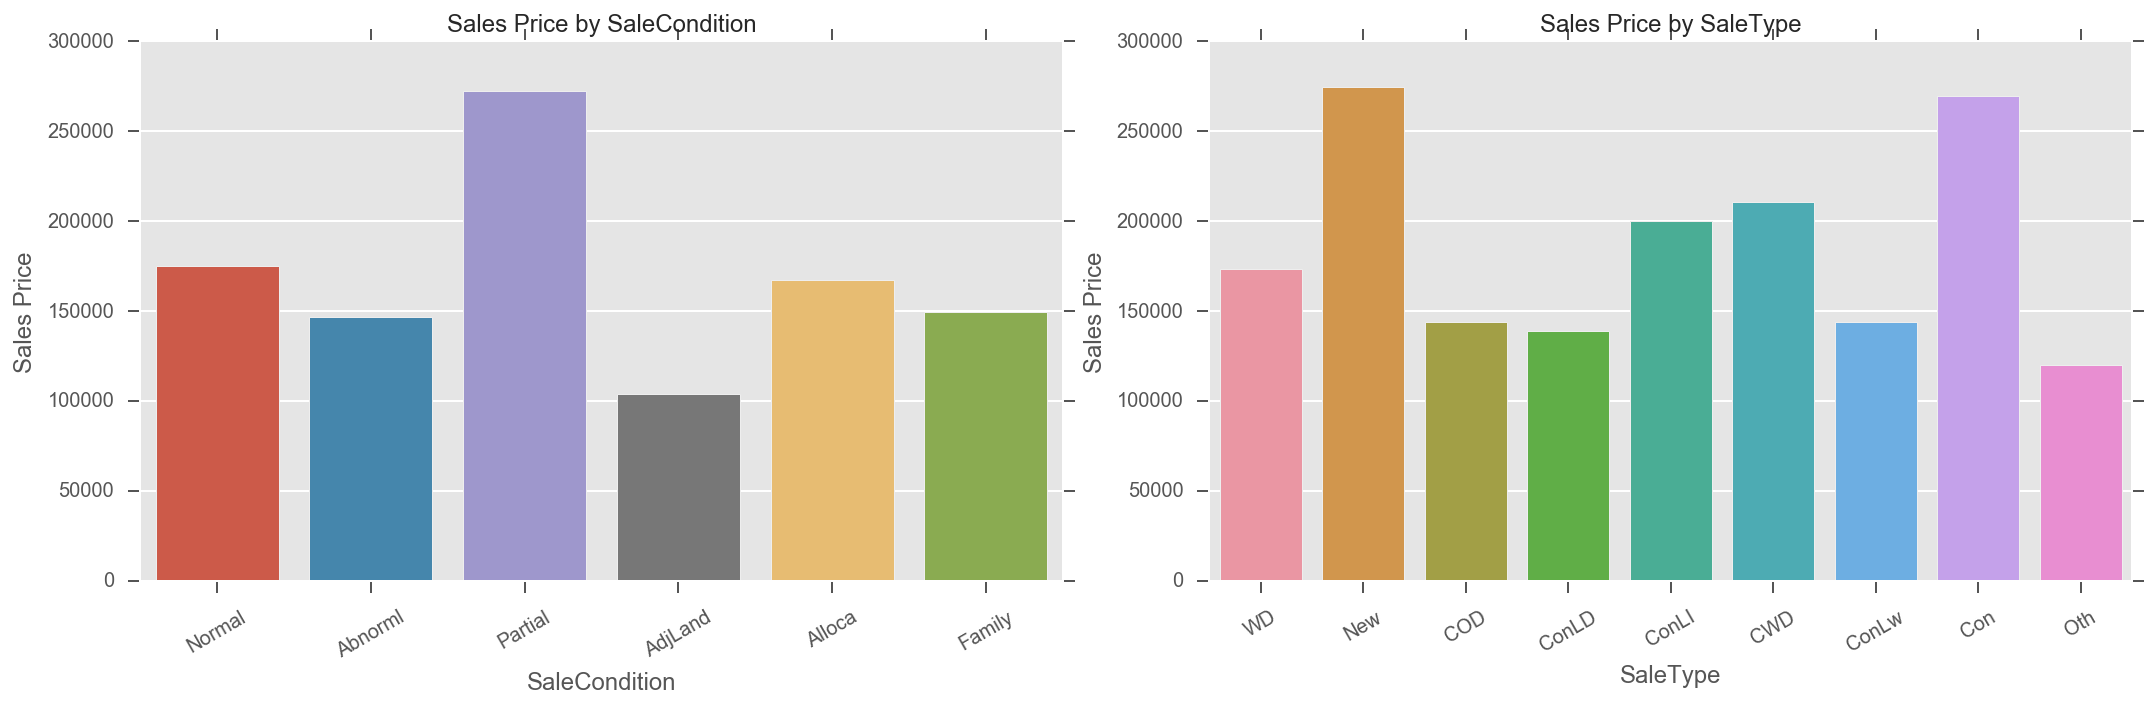

In [24]:
multiplePlots(saleVar)

### Land Related Variables
`LandSlope` seems to be ordinal. I will assume flat land is superior over steep land.

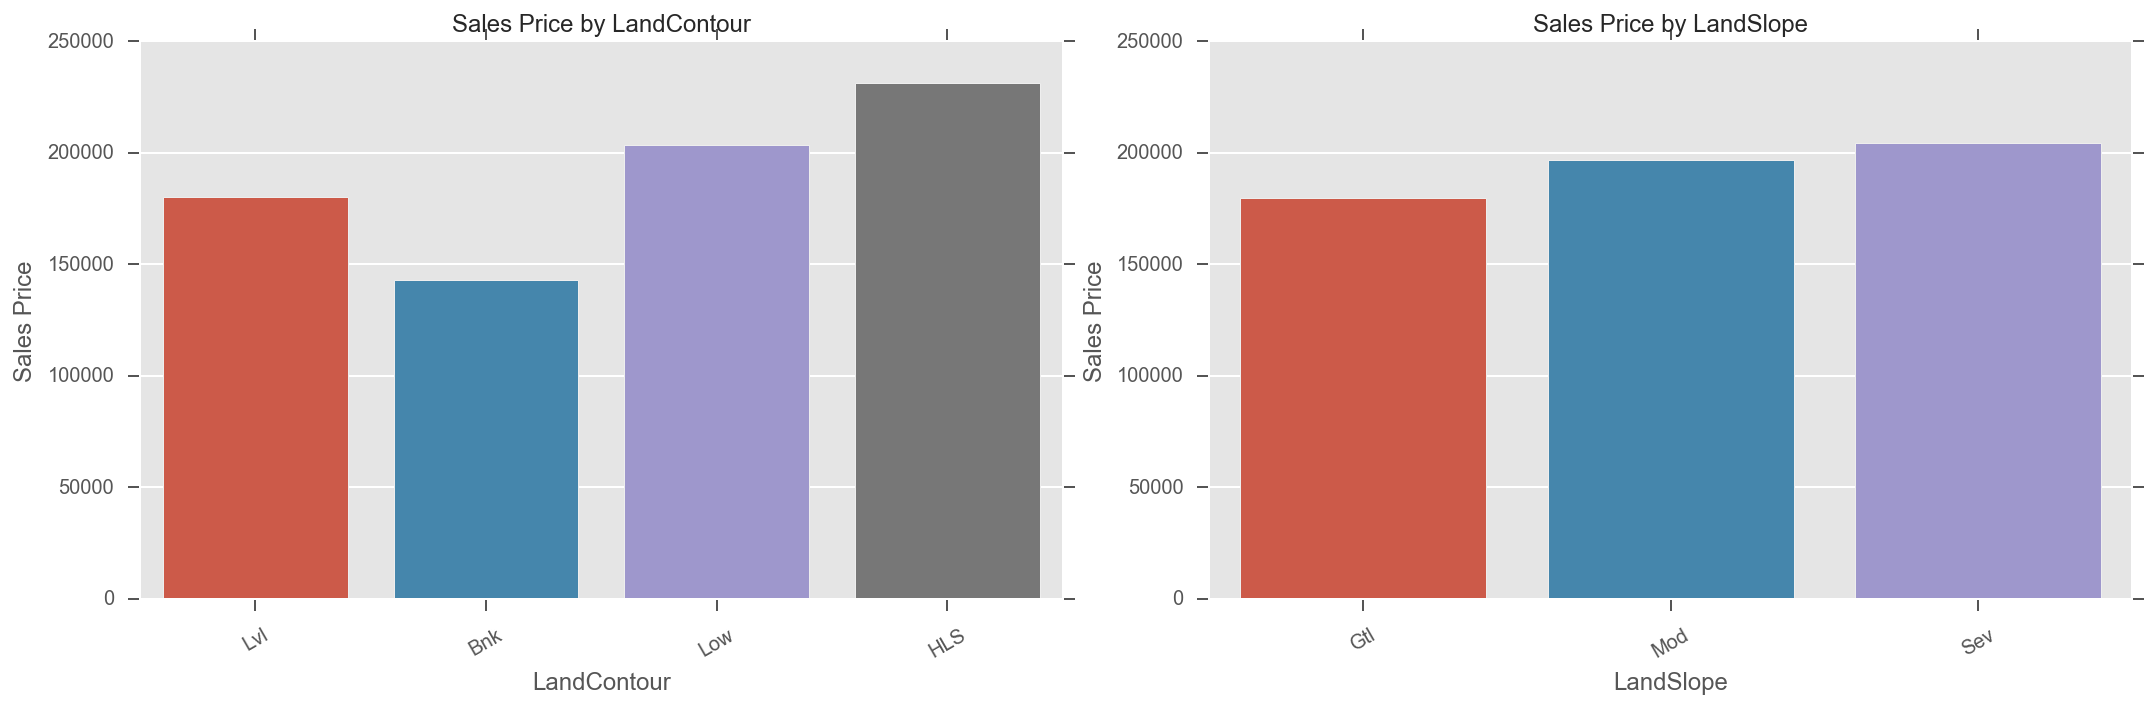

In [25]:
multiplePlots(landVar)

In [26]:
combined.LandSlope.replace({'Sev' : 0, 'Mod' : 1, 'Gtl' : 2}, inplace = True)

### Time Related Variables
Generally, newer houses and garages are more pricey which is somewhat obvious. However, 'WHEN' the house was sold does not have effect on the `SalePrice`. So, I will use these time related variables to create new features that might help us to capture more information about the variation in `SalePrice`.

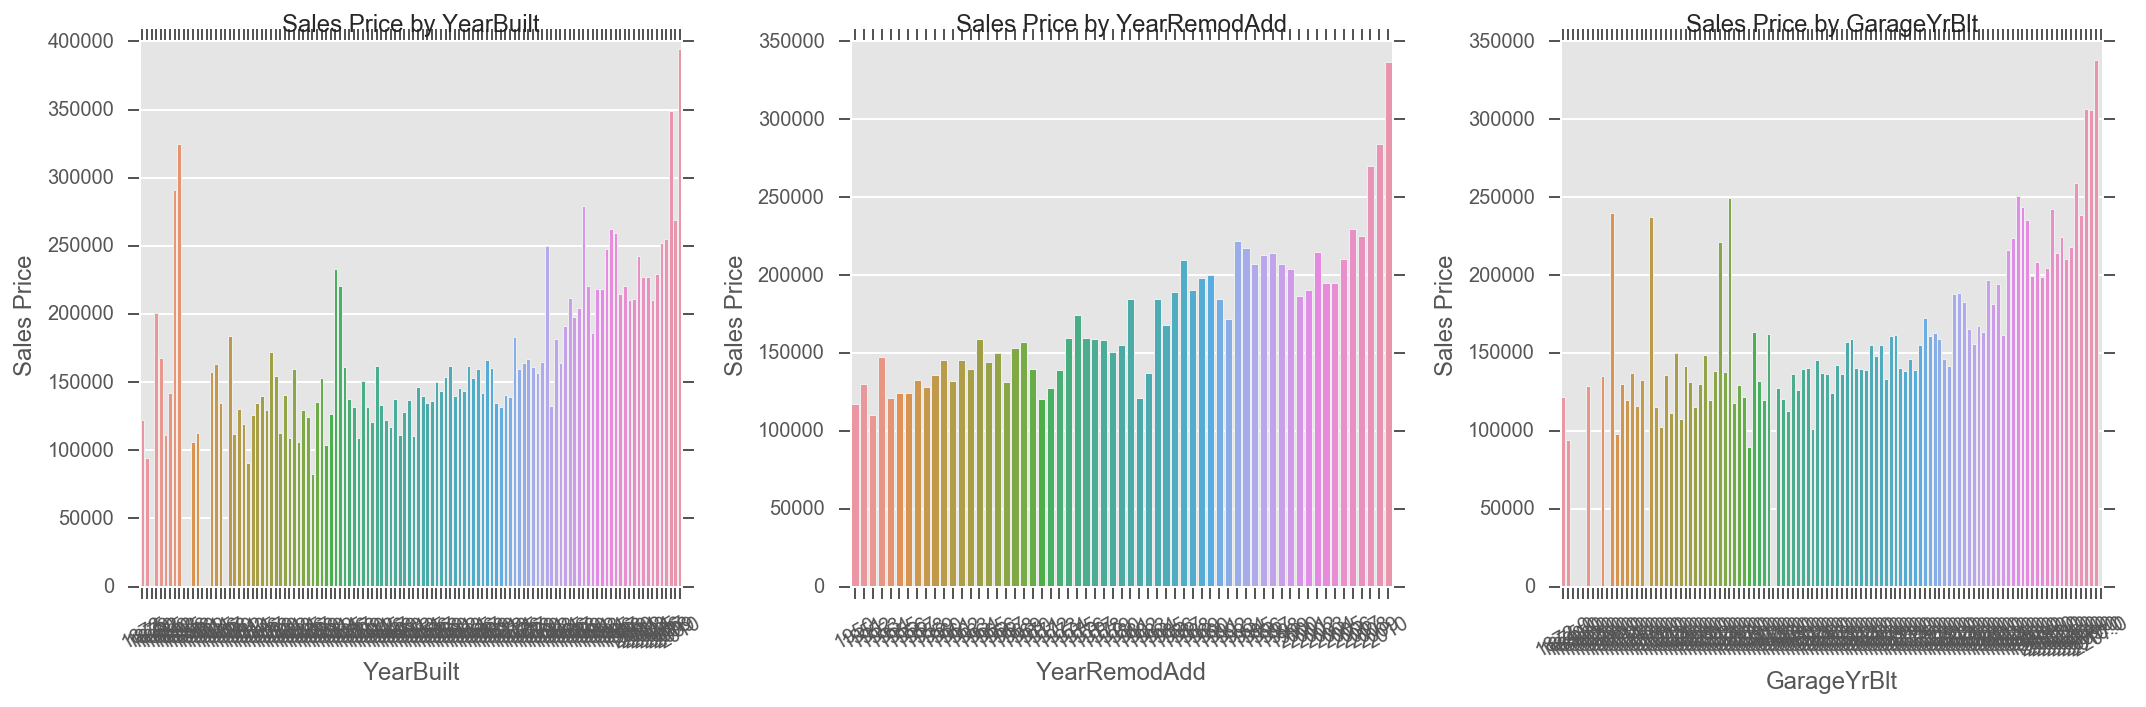

In [27]:
multiplePlots(timeVars1)

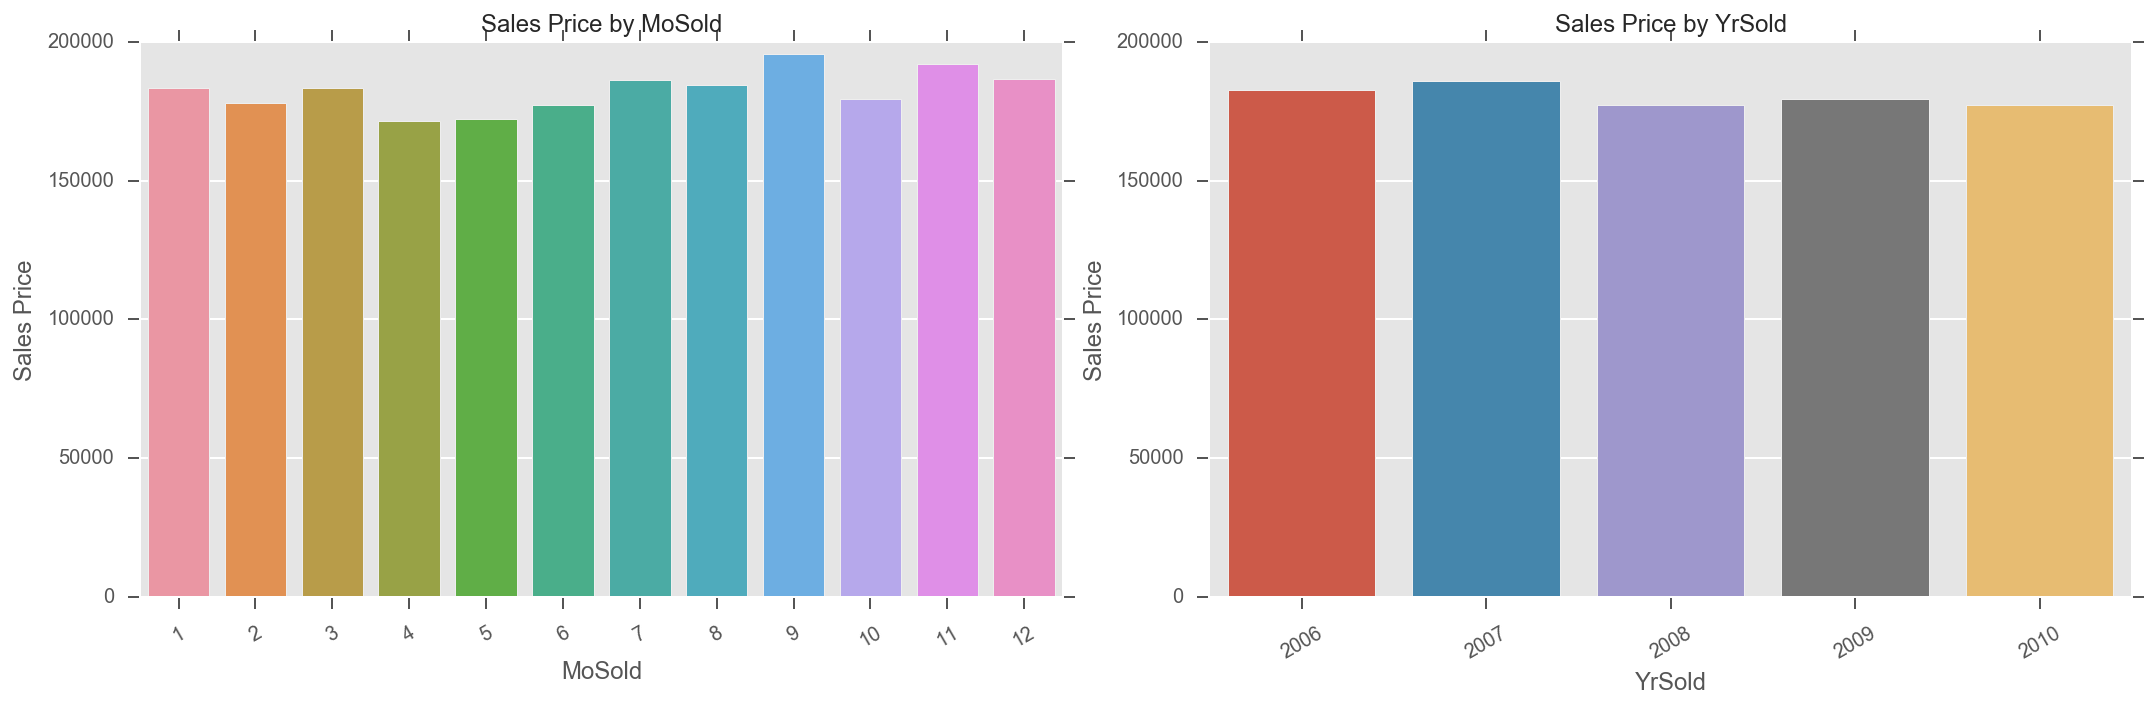

In [28]:
multiplePlots(timeVars2)

### Other Variables 1
`PavedDrive` seems to be ordinal. 

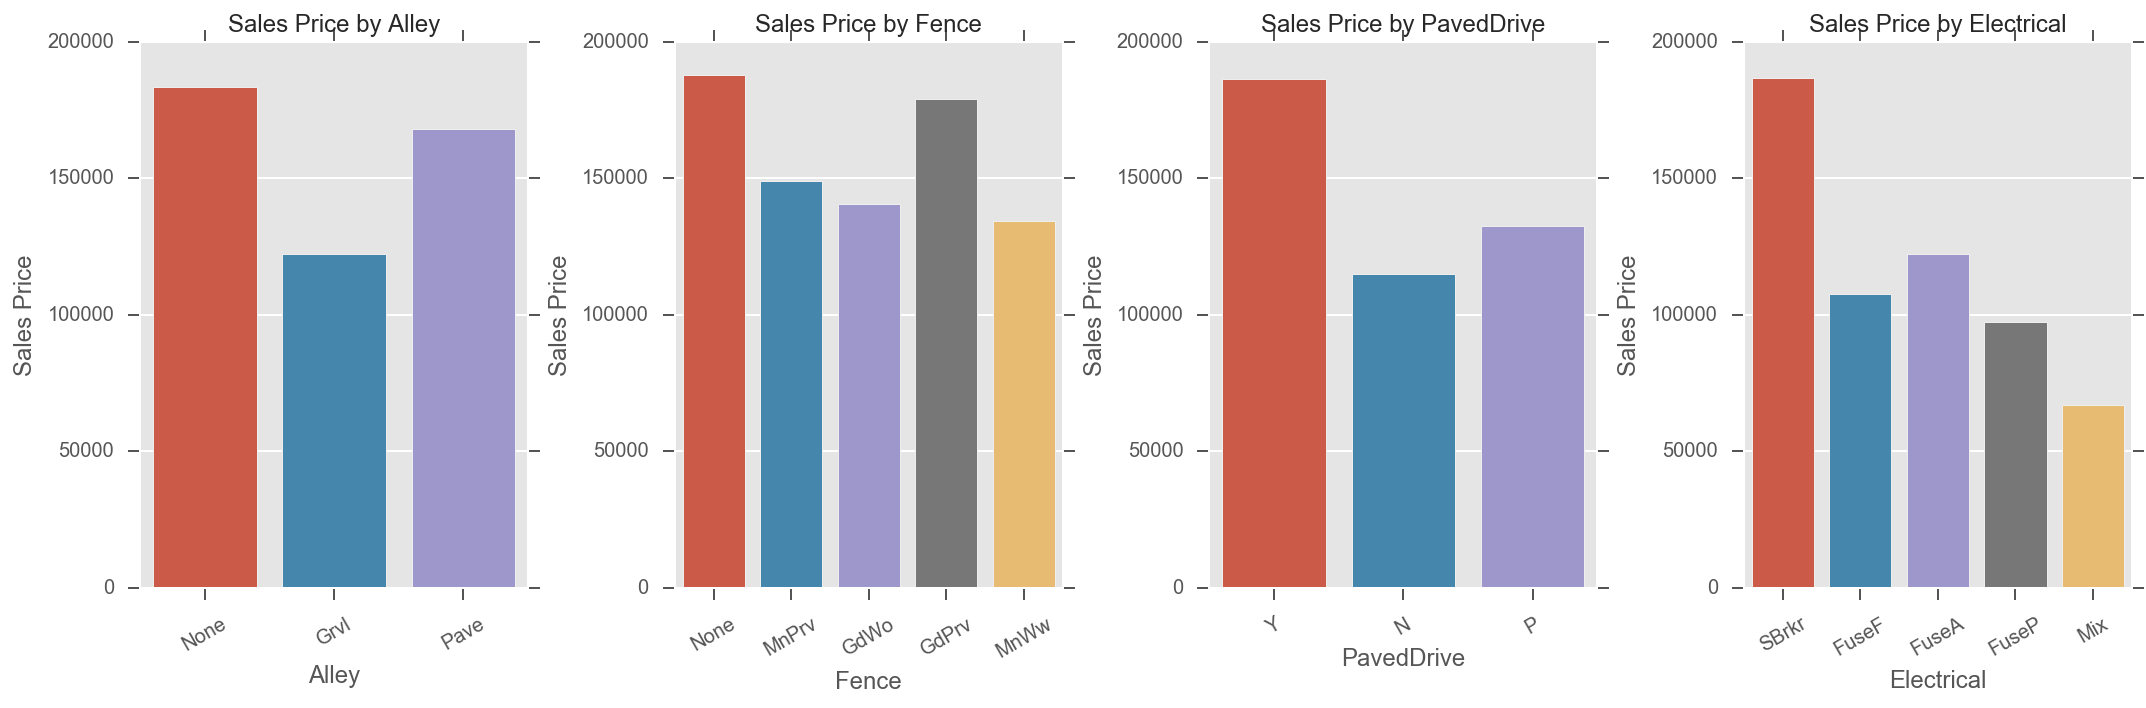

In [29]:
multiplePlots(others1)

In [30]:
combined.PavedDrive.replace({'N' : 0, 'P' : 1, 'Y' : 2}, inplace = True)

### Other Variables 2
`PoolQC` and `FireplaceQu` seems to be ordinal.

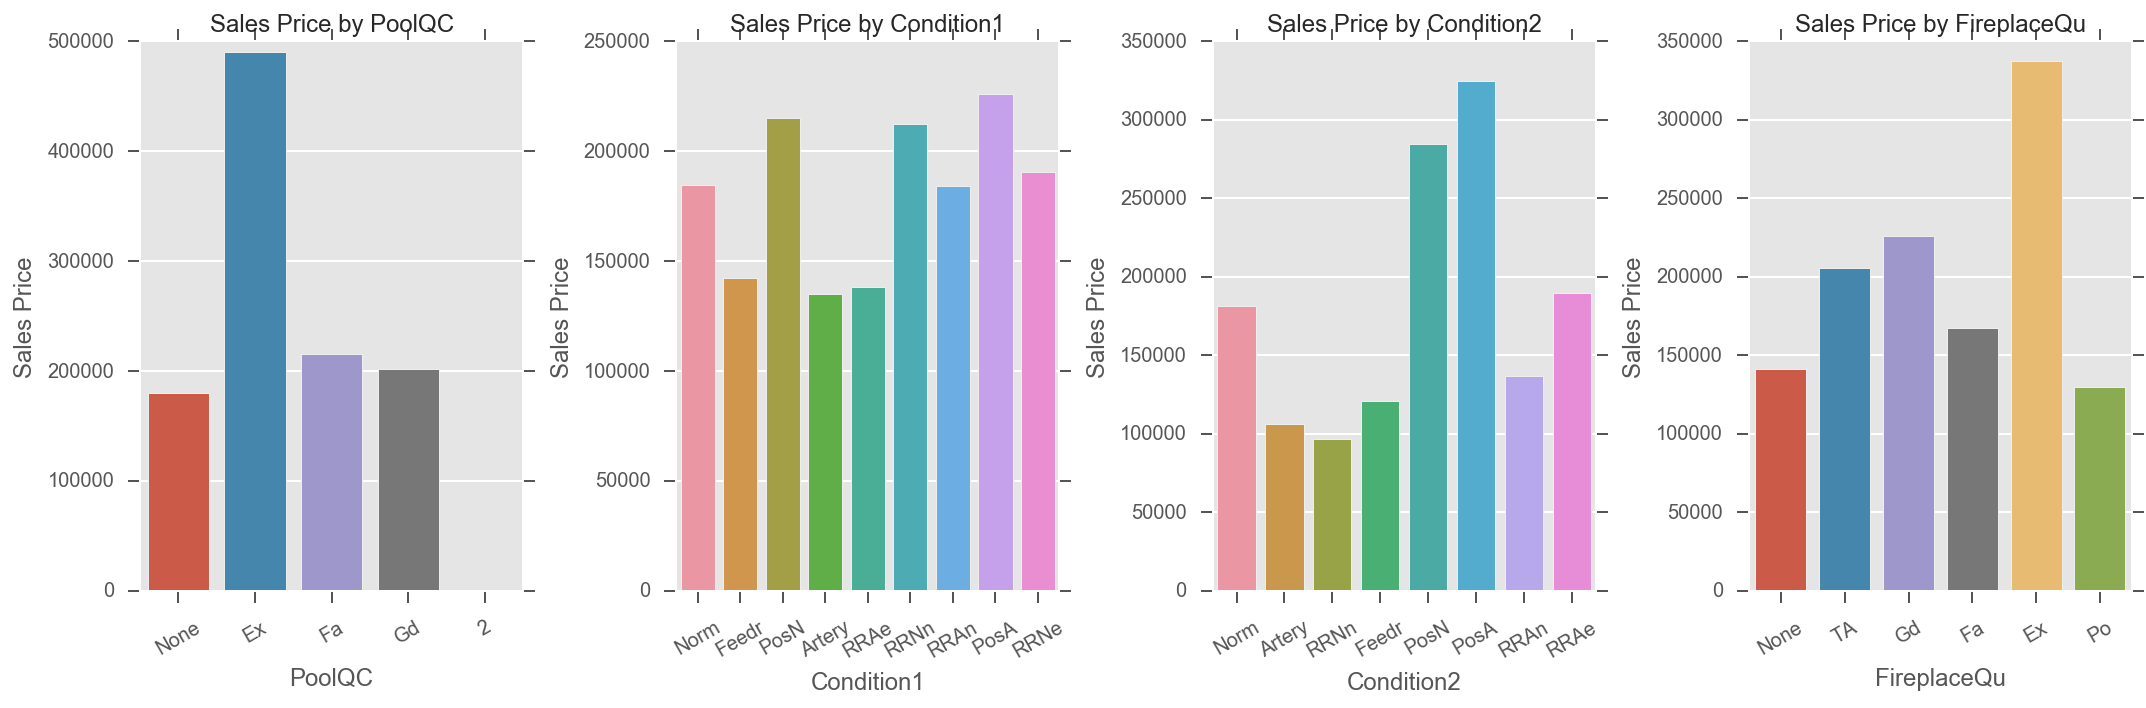

In [31]:
multiplePlots(others2)

In [32]:
combined.PoolQC.replace({'None' : 0, 'Fa' : 1, 'TA' : 2, 'Gd' : 3, 'Ex' : 4}, inplace = True)
combined.FireplaceQu.replace({'None' : 0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5}, inplace = True)

### Other Variables - 3
There seems to be ordinality in `MasVnrType`. Houses with cheaper material for masonry veneer have lower prices. 'None' and 'BrkCmn' types have similar house prices so I will assign them the same numeric value. <br>
Also, `Functional` and `KitchenQual` seems to be ordinal. 

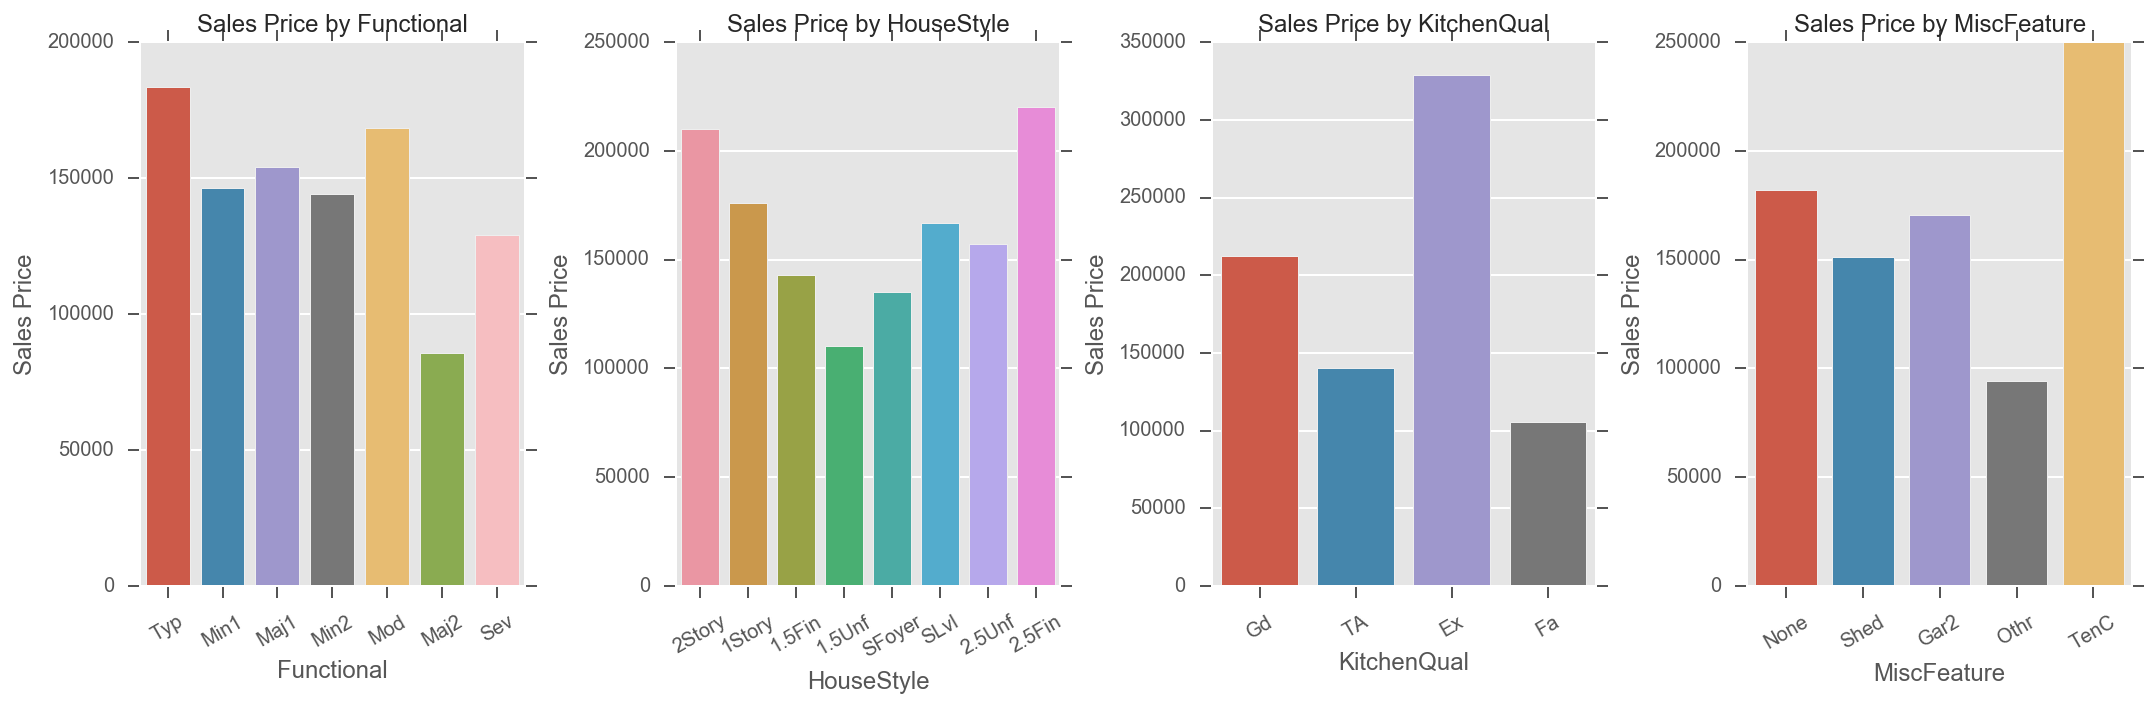

In [33]:
multiplePlots(others3)

In [34]:
combined.Functional.replace({'Sal' : 0, 'Sev' : 1, 'Maj2' : 2, 'Maj1' : 3, 'Mod' : 4, 
                             'Min2' : 5, 'Min1' : 6, 'Typ' : 7}, inplace = True)

combined.MasVnrType.replace({'None' : 0, 'BrkCmn' : 0, 'BrkFace' : 1, 'Stone' : 2}, inplace = True)
combined.KitchenQual.replace({'Fa' : 0, 'TA' : 1, 'Gd' : 2, 'Ex' : 3}, inplace = True)

### Other Variables 4
None of the variables show ordinality. So, I will leave them as they are.

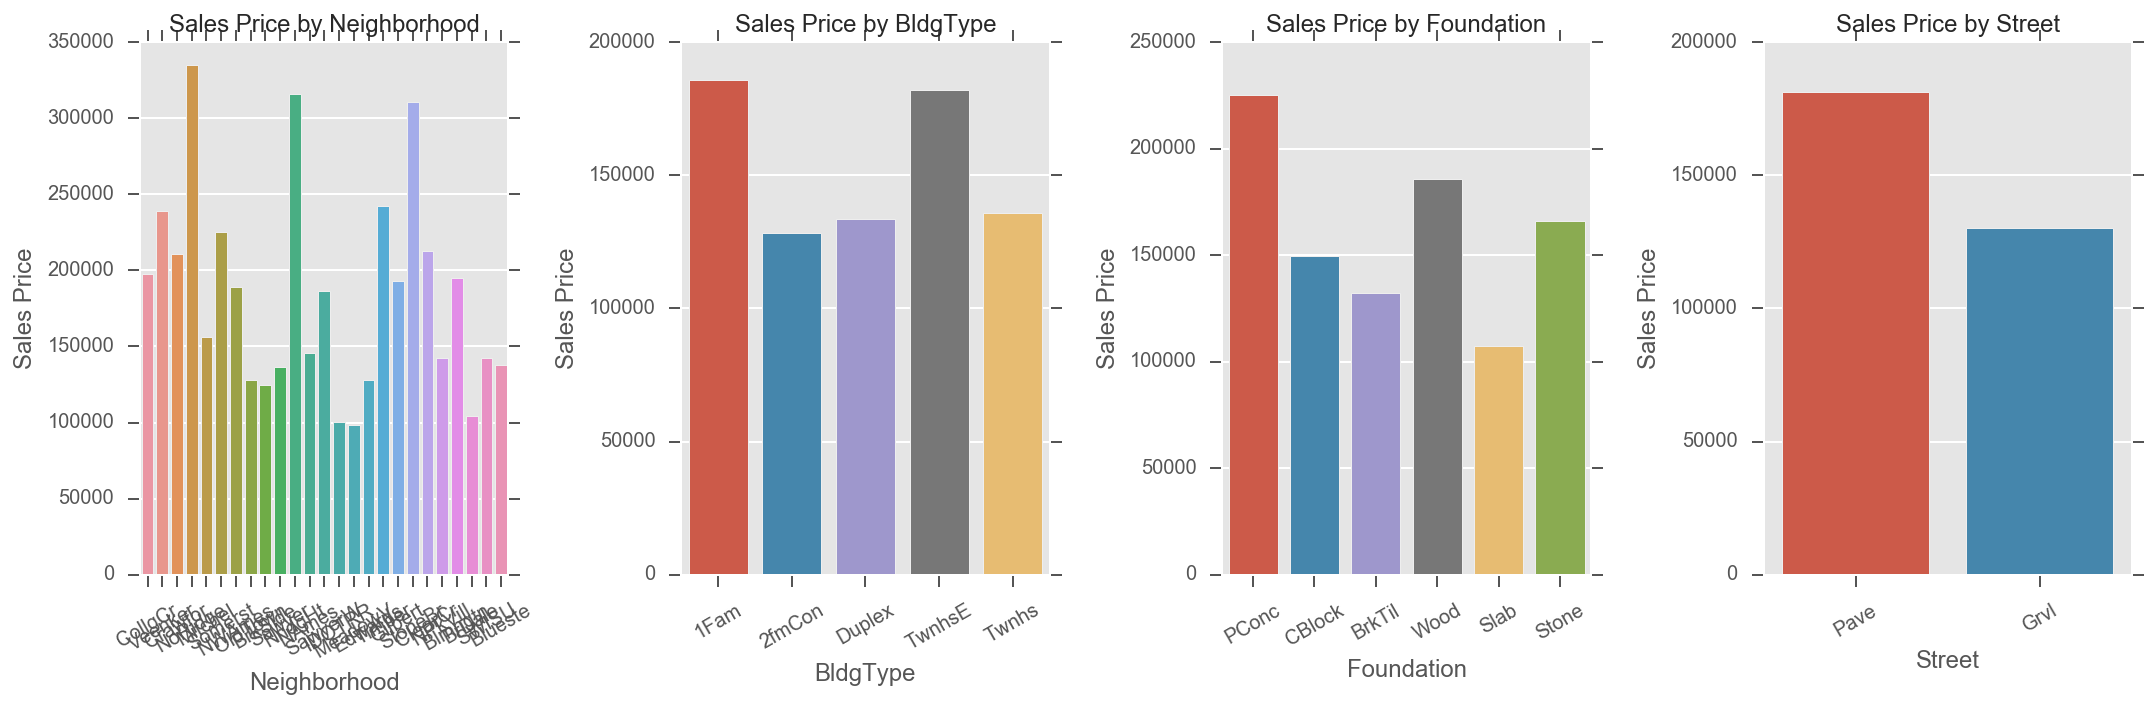

In [35]:
multiplePlots(others4)

### Other Variables 5
None of the variables show ordinality. So, I will leave them as they are.

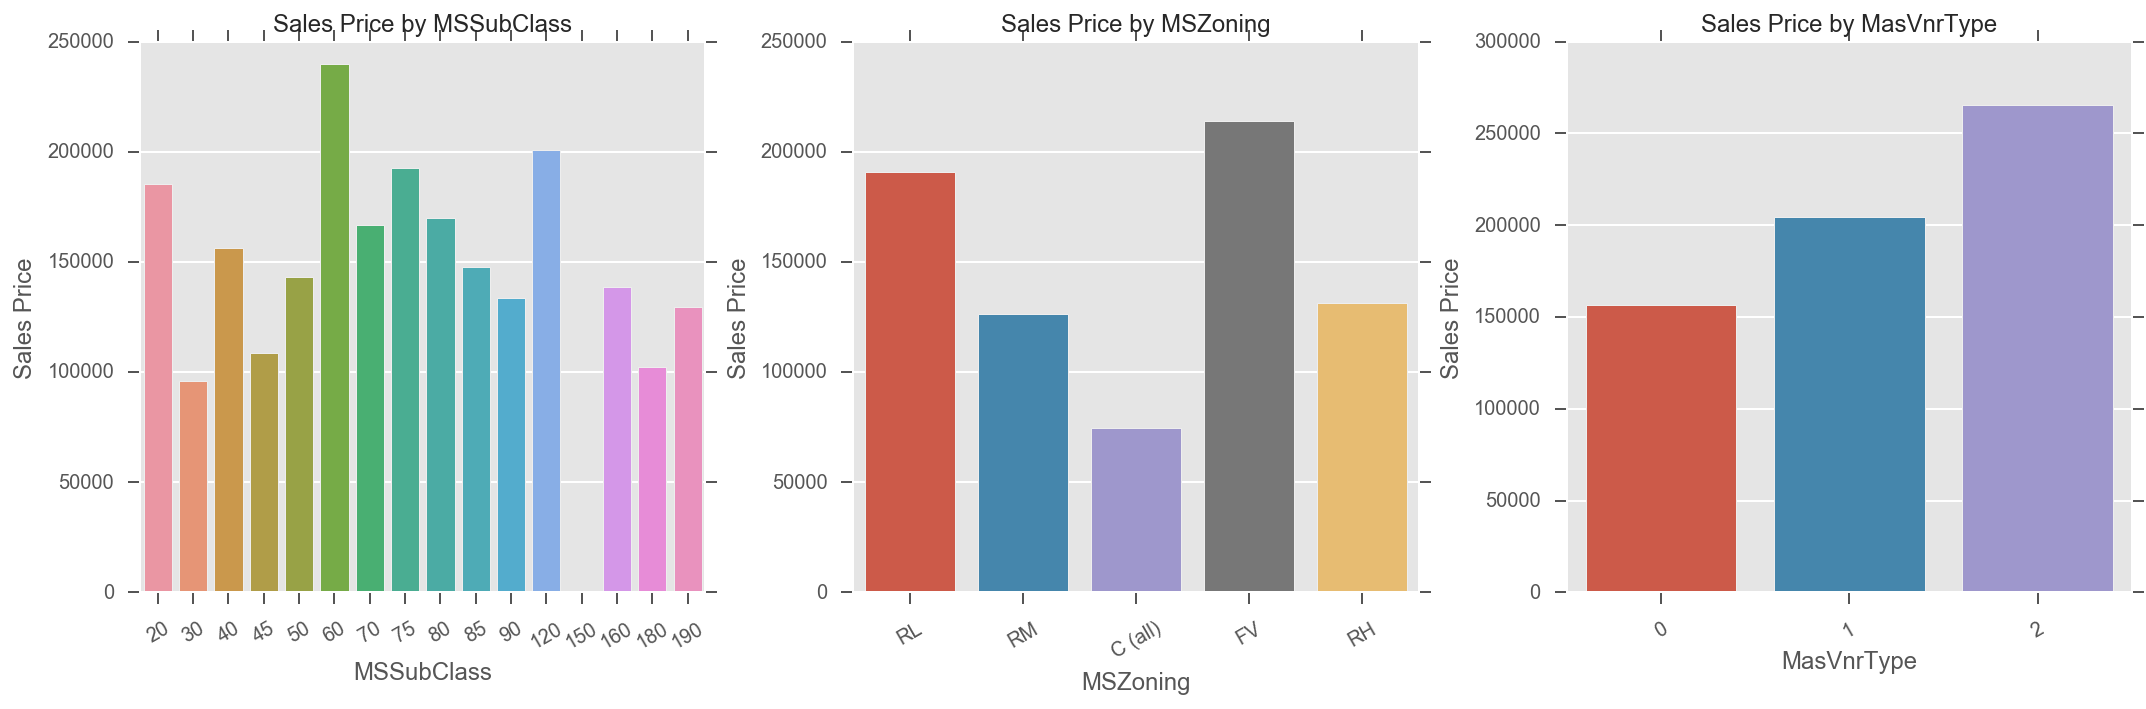

In [36]:
multiplePlots(others5)

In [37]:
combined.MSSubClass = combined.MSSubClass.astype(object)
combined.MSSubClass.replace({'20' : '1-STORY 1946 & NEWER ALL STYLES', '30' : '1-STORY 1945 & OLDER',
                             '40' : '1-STORY W/FINISHED ATTIC ALL AGES', '45' : '1-1/2 STORY - UNFINISHED ALL AGES',
                             '50' : '1-1/2 STORY FINISHED ALL AGES', '60' : '2-STORY 1946 & NEWER',
                             '70' : '2-STORY 1945 & OLDER', '75' : '2-1/2 STORY ALL AGES', '80' : 'SPLIT OR MULTI-LEVEL',
                             '85' : 'SPLIT FOYER', '90' : 'DUPLEX - ALL STYLES AND AGES',
                             '120' : '1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
                             '150' : '1-1/2 STORY PUD - ALL AGES', '160' : '2-STORY PUD - 1946 & NEWER',
                             '180' : 'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
                             '190' : '2 FAMILY CONVERSION - ALL STYLES AND AGES'}, inplace = True)

In [38]:
ordinal, cateVar = [], []
for var in categorical:
    if combined[var].dtype != 'object':
        ordinal.append(var)
    else:
        cateVar.append(var)

In [39]:
len(ordinal) + len(cateVar) + len(numerical)

78

In [40]:
combined.shape

(2919, 78)

In [41]:
# recover train_set and test_set for further analysis
train_set = combined[:ntrain]
train_set = pd.concat([train_set, y_train], axis = 1)
train_set = pd.concat([train_ID, train_set], axis = 1)
        
test_set = combined[ntrain:].reset_index(drop=True)
test_set = pd.concat([(test_ID), test_set], axis = 1)

# Explanatory Data Analysis and Feature Engineering

## Correlation Pairplot
Let's look at the correlation among variables. I presented two heatmap graphs for Numerical and Ordinal variables.<br><br> The plot only shows the top 10 highly correlated variables with `SalePrice`. 

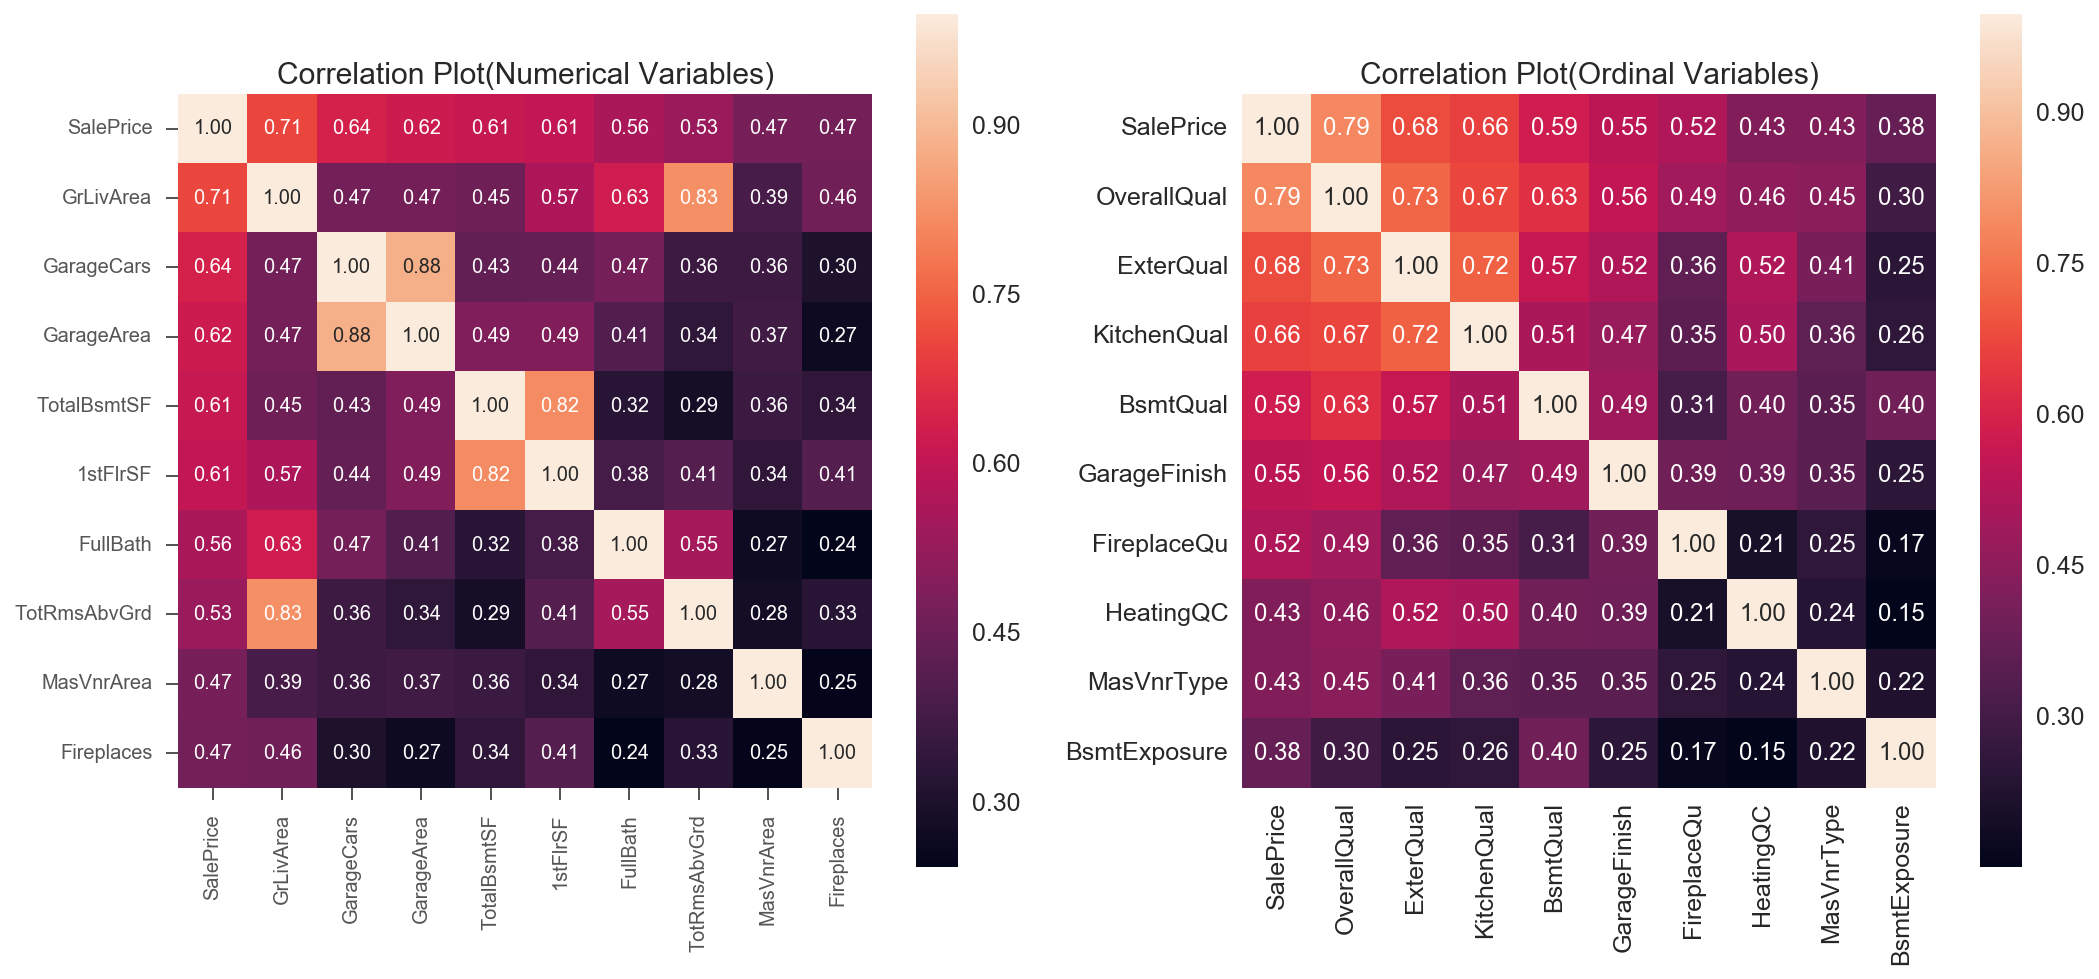

In [42]:
f, ax = plt.subplots(figsize=(15, 7))

plt.subplot(1,2,1)
corrNumVar = numerical + ['SalePrice']
corrMat = train_set[corrNumVar].corr()
n = 10 # number of variables for heatmap
cols = corrMat.nlargest(n, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_set[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10 }, yticklabels=cols.values, xticklabels=cols.values)
plt.title('Correlation Plot(Numerical Variables)', fontsize = 15)

plt.subplot(1,2,2)
corrOrdinVar = ordinal + ['SalePrice']
corrMat = train_set[corrOrdinVar].corr()
n = 10 # number of variables for heatmap
cols = corrMat.nlargest(n, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_set[cols].values.T)
sns.heatmap(cm, square=True, annot=True, fmt='.2f', annot_kws={'size': 12}, yticklabels=cols.values, xticklabels=cols.values)
plt.title('Correlation Plot(Ordinal Variables)', fontsize = 15)

plt.tight_layout()
plt.show()

Among numerical variables,
> `GrLivArea` - `TotRmsAbvGrd` (0.83) <br>
> `GarageCars` - `GarageArea` (0.88) <br>
> `TotalBsmtSF` - `1stFlrSF` (0.82) <br>

are strongly and positively correlated. 

Among ordinal variables, `ExterQual` - `KitchenQual` (0.72) are strongly and positively correlated.

From each pair, I will drop one variable that is less correlated to `SalePrice`.
> `GrLivArea` (0.71), `TotRmsAbvGrd` (0.53) <br>
> `GarageCars` (0.64), `GarageArea` (0.62) <br>
> `TotalBsmtSF` (0.61) `1stFlrSF` (0.61) <br>
> `ExterQual` (0.68), `KitchenQual` (0.68)


In [43]:
combined.drop('TotRmsAbvGrd', axis = 1, inplace = True)
combined.drop('GarageArea', axis = 1, inplace = True)
combined.drop('1stFlrSF', axis = 1, inplace = True)
combined.drop('KitchenQual', axis = 1, inplace = True)

## Exploring Related Variables 

### House Size Variables

Sum of `1stFlrSF`, `2ndFlrSF`, `LowQualFinSF` values yields `GrLivArea`.

In [44]:
train_set.loc[:,['GrLivArea','1stFlrSF','2ndFlrSF','LowQualFinSF']][combined.LowQualFinSF != 0].head()

,GrLivArea,1stFlrSF,2ndFlrSF,LowQualFinSF
51,1176,816,0,360
88,1526,1013,0,513
125,754,520,0,234
170,1382,854,0,528
185,3608,1518,1518,572


In [45]:
train_set.loc[:,['SalePrice','GrLivArea','1stFlrSF','2ndFlrSF','LowQualFinSF']].corr()

,SalePrice,GrLivArea,1stFlrSF,2ndFlrSF,LowQualFinSF
SalePrice,1.000000,0.708624,0.605852,0.319334,-0.025606
GrLivArea,0.708624,1.000000,0.566024,0.687501,0.134683
1stFlrSF,0.605852,0.566024,1.000000,-0.202646,-0.014241
2ndFlrSF,0.319334,0.687501,-0.202646,1.000000,0.063353
LowQualFinSF,-0.025606,0.134683,-0.014241,0.063353,1.000000


Sum of `BsmtFinSF1`,`BsmtFinSF2`,`BsmtUnfSF` values yields `TotalBsmtSF`

In [46]:
train_set.loc[:,['TotalBsmtSF','BsmtFinSF1','BsmtUnfSF','BsmtFinSF2']][combined.BsmtFinSF2 != 0].head()

,TotalBsmtSF,BsmtFinSF1,BsmtUnfSF,BsmtFinSF2
7,1107.0,859.0,216.0,32.0
24,1060.0,188.0,204.0,668.0
26,900.0,234.0,180.0,486.0
42,840.0,747.0,0.0,93.0
43,938.0,280.0,167.0,491.0


In [47]:
train_set.loc[:,['SalePrice','TotalBsmtSF','BsmtFinSF1','BsmtUnfSF','BsmtFinSF2']].corr()

,SalePrice,TotalBsmtSF,BsmtFinSF1,BsmtUnfSF,BsmtFinSF2
SalePrice,1.000000,0.613581,0.386420,0.214479,-0.011378
TotalBsmtSF,0.613581,1.000000,0.522396,0.415360,0.104810
BsmtFinSF1,0.386420,0.522396,1.000000,-0.495251,-0.050117
BsmtUnfSF,0.214479,0.415360,-0.495251,1.000000,-0.209294
BsmtFinSF2,-0.011378,0.104810,-0.050117,-0.209294,1.000000


Although `GrLivArea` and `TotalBsmtSF` are merely sums of other variables, I am not sure if dropping variables sums up to those two can be dropped yet. So, I will try in both ways and choose one with better performance. 

In [48]:
#combined.drop(['1stFlrSF','2ndFlrSF','LowQualFinSF'], axis = 1, inplace = True)
#combined.drop(['BsmtFinSF1','BsmtUnfSF','BsmtFinSF2'], axis = 1, inplace = True)

### Bathroom Variables

Bathroom related variables doesn't seem to be ordinal nor categorical. I suggest generating `TotalBath` variable by summing up the number of bathrooms for each house. 

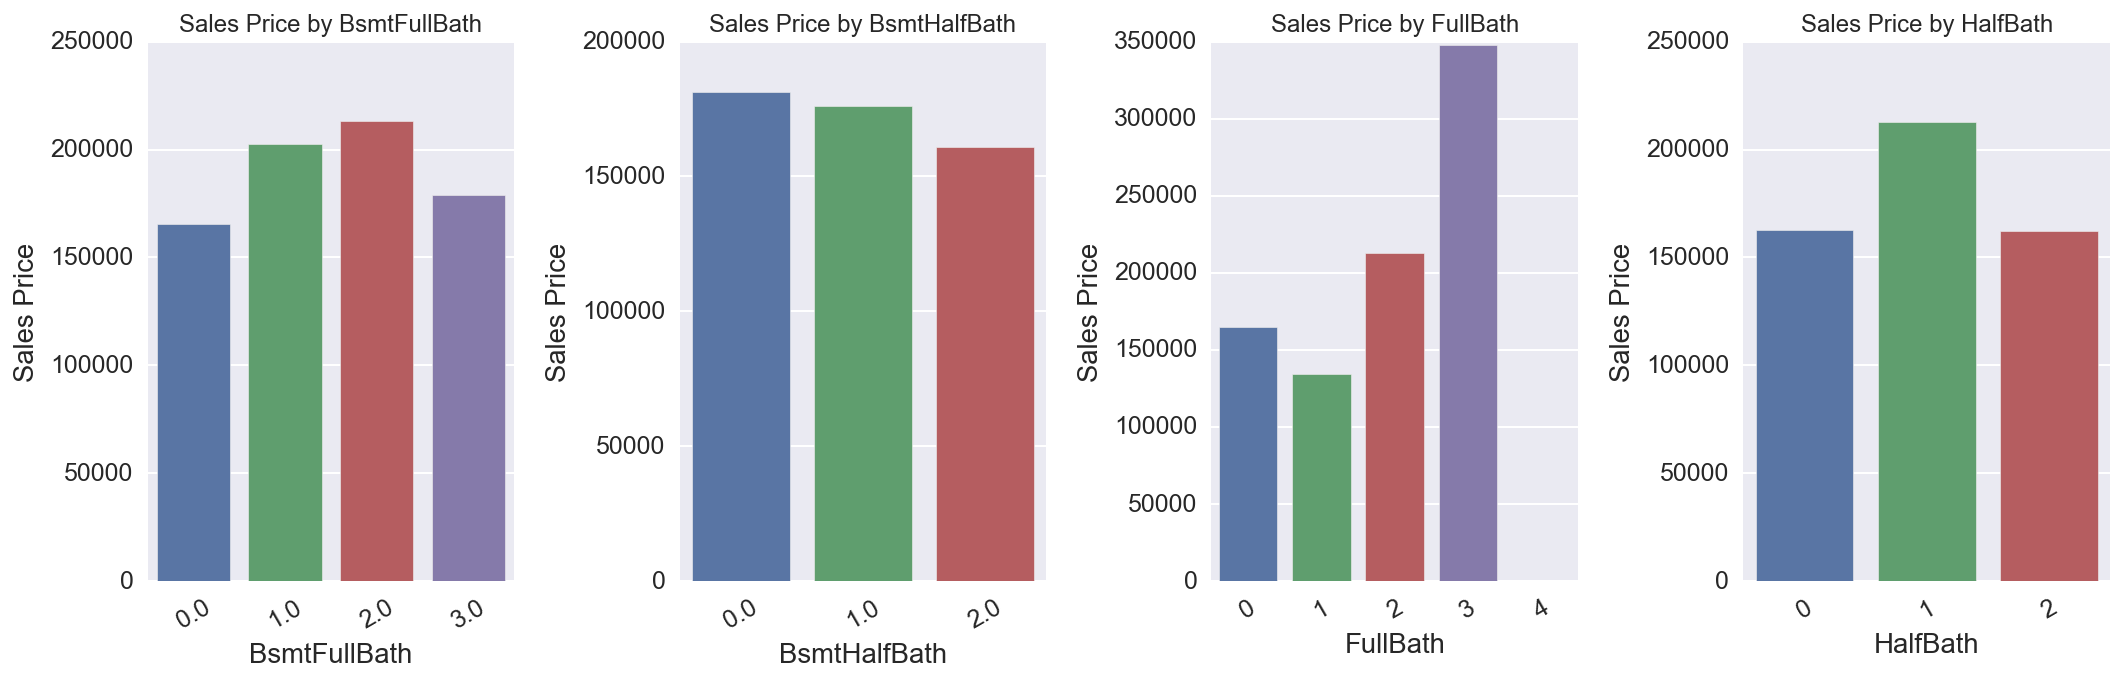

In [49]:
multiplePlots(['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath'])

In [50]:
TotalBath = combined.BsmtFullBath + combined.FullBath + (combined.HalfBath + combined.BsmtHalfBath)* 0.5
BathRooms = pd.concat([combined.loc[:,['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath']], TotalBath], axis =1)
BathRooms.rename(columns = {0 : 'TotalBath'}, inplace = True)
BathRooms.head()

,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,TotalBath
0,1.0,0.0,2,1,3.5
1,0.0,1.0,2,0,2.5
2,1.0,0.0,2,1,3.5
3,1.0,0.0,1,0,2.0
4,1.0,0.0,2,1,3.5


Looking at the barplot below, there seems to be an increasing pattern in sales price from 1 ~ 4.5 bathrooms but drastically drops beyond that point. <br> Since this pattern is telling much more about the `SalesPrice`, I will replace other bathroom related variables with `TotalBath`.

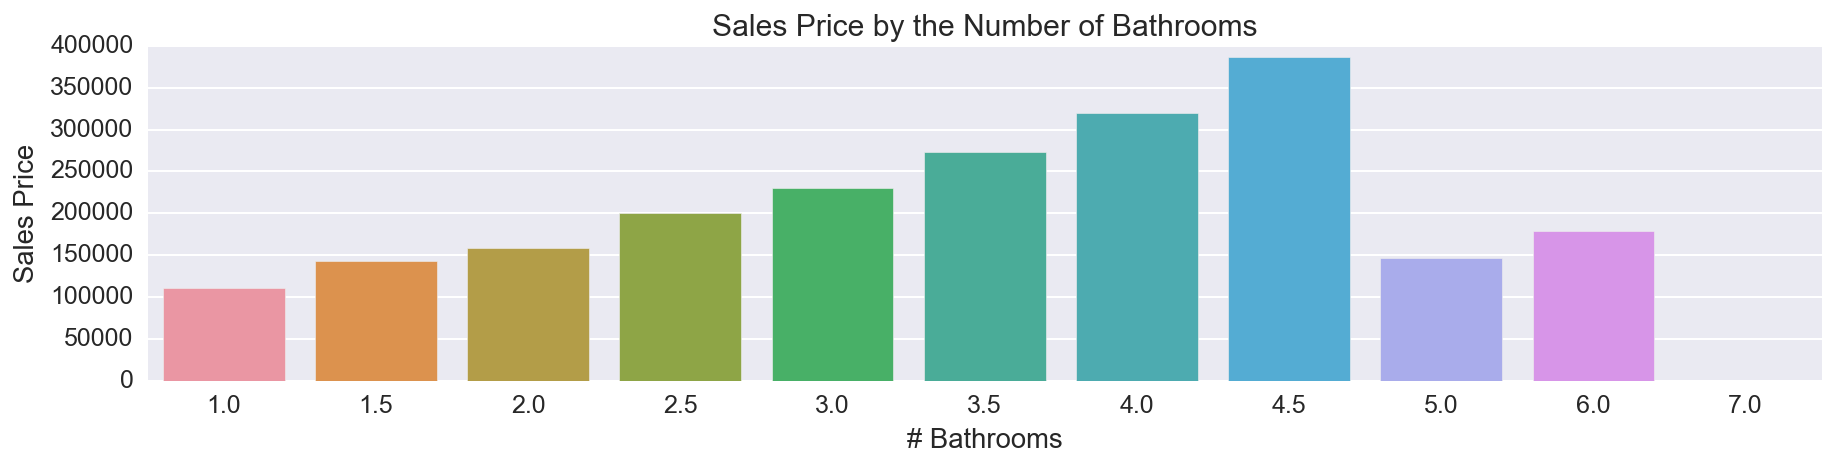

In [51]:
f, ax = plt.subplots(figsize=(15, 3))
sns.barplot(TotalBath, y_train, ci = False)
plt.xlabel('# Bathrooms'); plt.ylabel('Sales Price')
plt.title('Sales Price by the Number of Bathrooms', fontsize = 15)
plt.show()

In [52]:
combined.drop(['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath'], axis = 1, inplace = True)
combined = pd.concat([combined, TotalBath], axis = 1)
combined.rename(columns = {0 : 'TotalBath'}, inplace = True)

### Porch Variables

`OpenPorchSF`, `EnclosedPorch`, `3SsnPorch`, `ScreenPorch` : Have Shelter

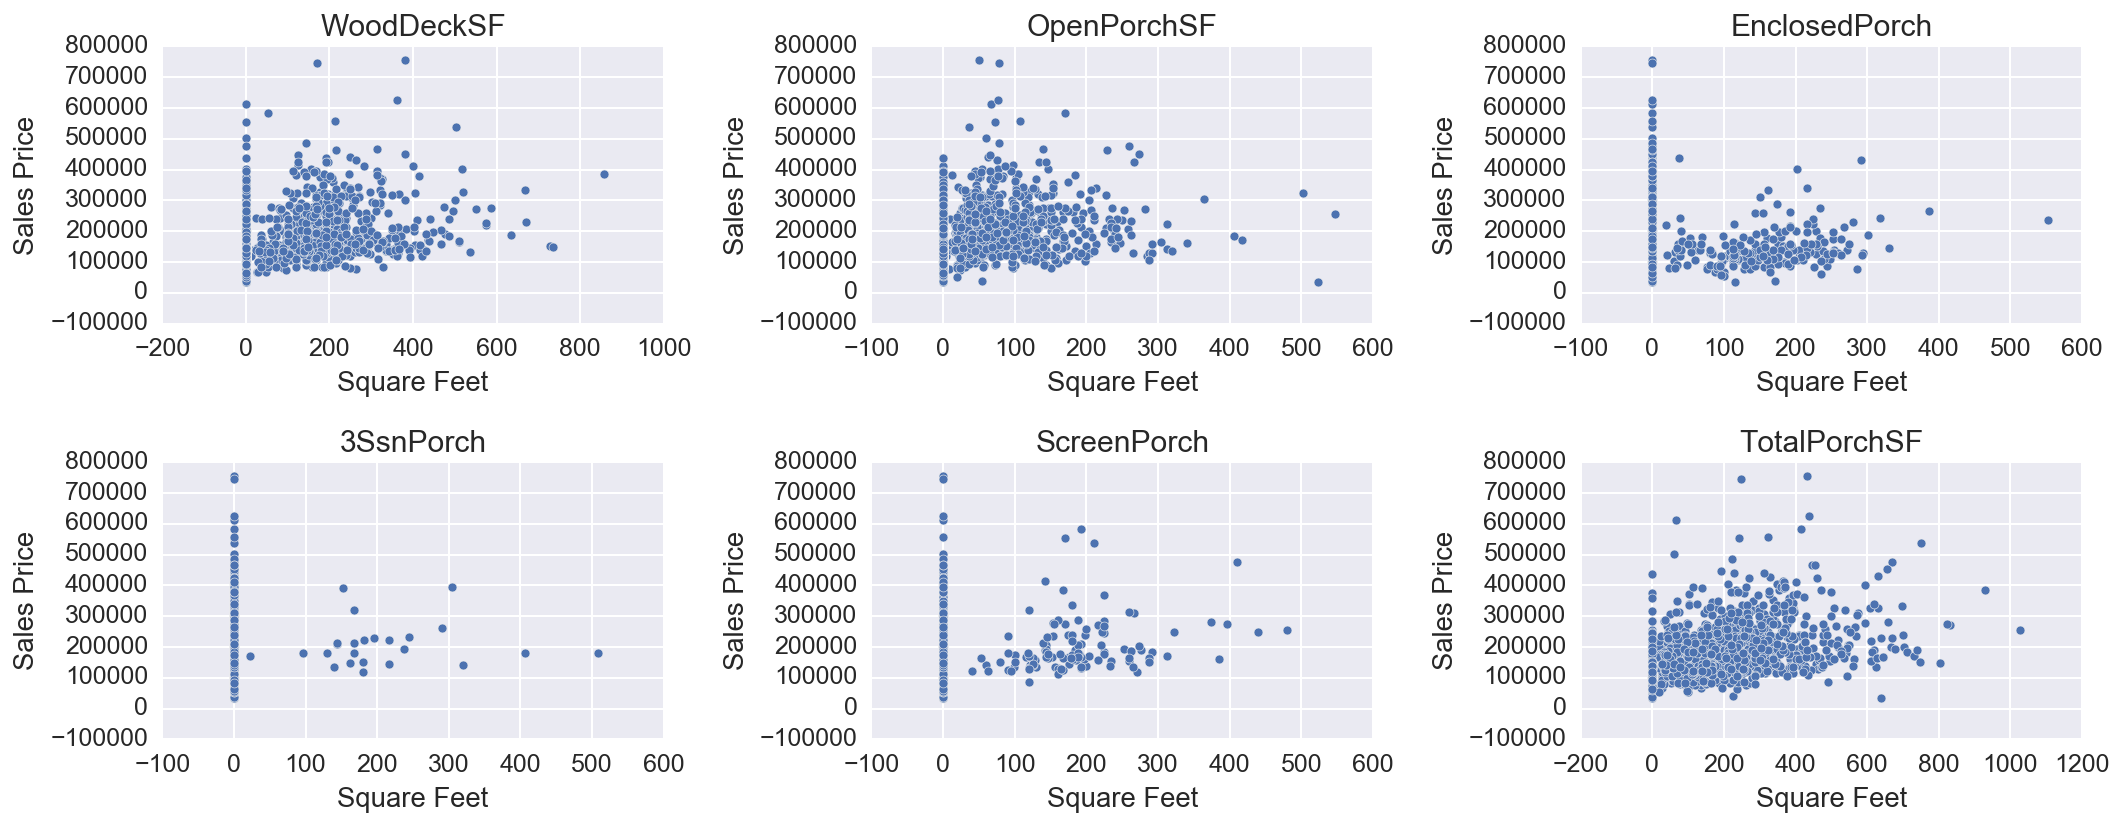

In [53]:
TotalPorchSF = train_set.loc[:, ['WoodDeckSF','OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']].apply(sum, axis = 1)

porchVar = ['WoodDeckSF','OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']

plt.subplots(figsize = (15,6))
for i in range(len(porchVar)):
    plt.subplot(2,3,i+1)
    plt.scatter(x = train_set.loc[:,porchVar[i]], y = y_train)
    plt.title(porchVar[i]); plt.xlabel('Square Feet'); plt.ylabel('Sales Price')

plt.subplot(2,3,6)
plt.scatter(x = TotalPorchSF, y = y_train)
plt.title('TotalPorchSF'); plt.xlabel('Square Feet'); plt.ylabel('Sales Price')
plt.tight_layout()    
plt.show()

House having larger porch in any type does not necessarily means higher `SalesPrice`. 

### Time Variables

The dataset contains five types of time related variable : `YrSold`, `MoSold`, `YearBuilt`, `YearRemodAdd`, `GarageYrBlt` <br> However, referring back to barplots of time related variables above, themselves does not provide much information about the variation in `SalesPrice`. So, I will transform and generate new variables to see if there are some interesting patterns otherwise unrecognized. 

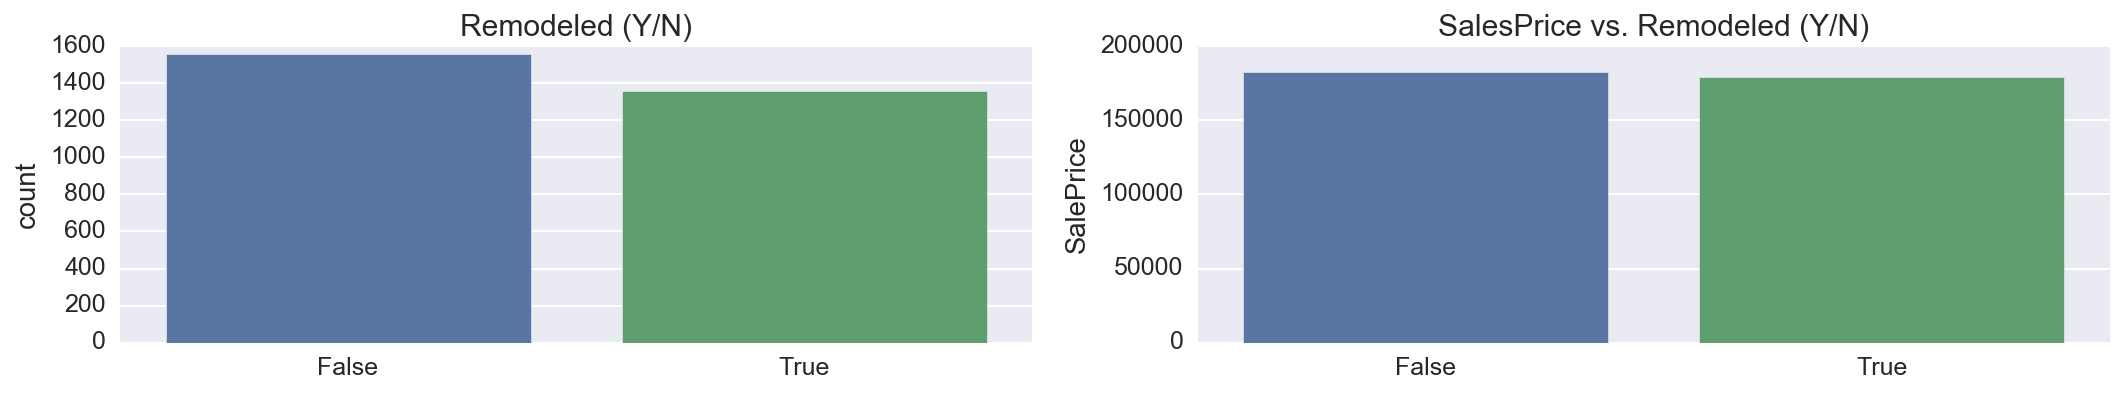

In [54]:
Remodeled = combined.YearBuilt != combined.YearRemodAdd
Remodeled.apply(lambda x: 1 if x == True else 0)

plt.subplots(figsize= (15,3))
plt.subplot(1,2,1)
sns.countplot(Remodeled)
plt.title('Remodeled (Y/N)', fontsize = 15)

plt.subplot(1,2,2)
sns.barplot(x = Remodeled, y = y_train, ci = False)
plt.title('SalesPrice vs. Remodeled (Y/N)')

plt.tight_layout()
plt.show()

Remodeling doesn't seems to have effect on the house prices in general. 

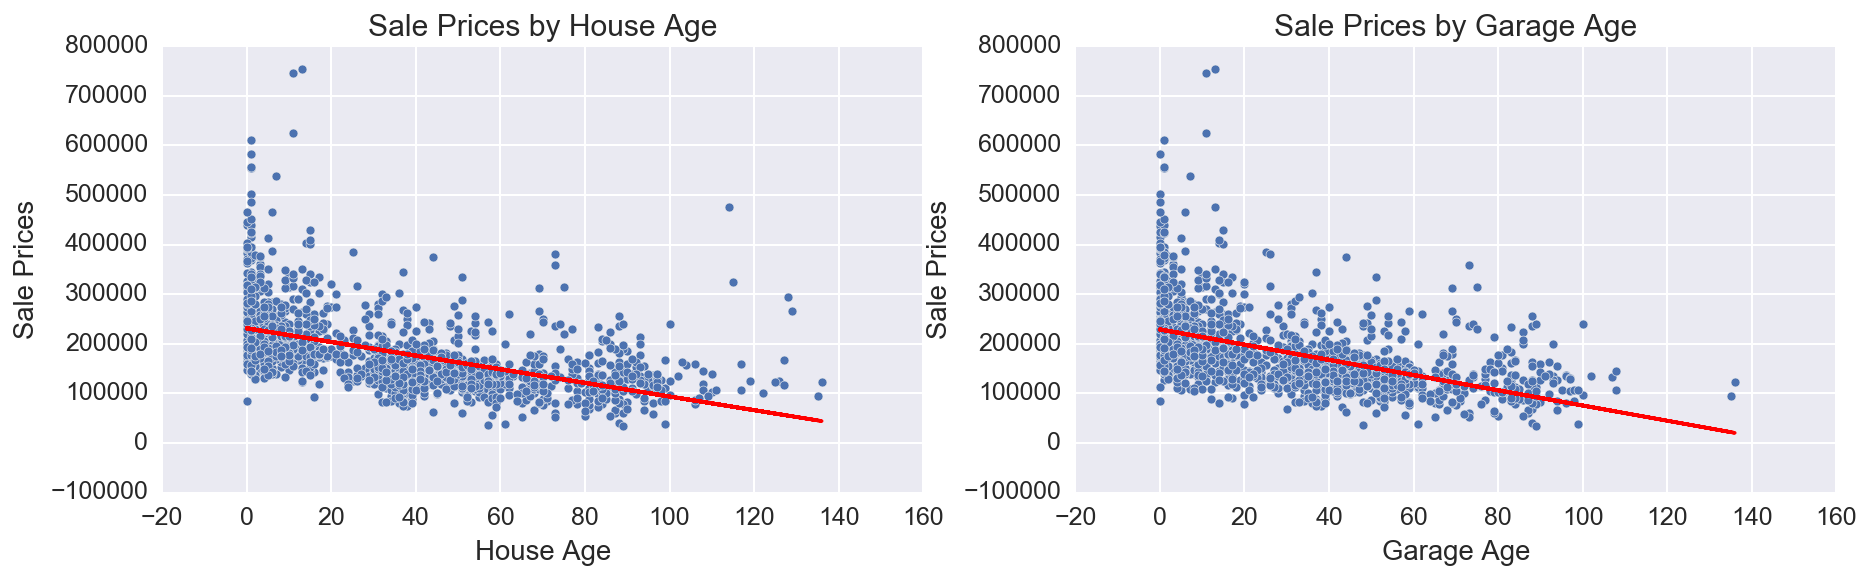

In [55]:
house_age = combined.YrSold - combined.YearBuilt
garage_age = combined.YrSold - combined.GarageYrBlt

house_age_train = house_age[:ntrain].astype('int')
garage_age_train = garage_age[:ntrain].astype('int')

fit_house = np.polyfit(x = house_age_train, y = y_train, deg = 1)
fit_garage = np.polyfit(x = garage_age_train, y = y_train, deg = 1)

fig, ax = plt.subplots(figsize=(15,4))
plt.subplot(1,2,1)
plt.scatter(x = house_age_train, y = y_train)
plt.plot(house_age_train, fit_house[0] * house_age_train + fit_house[1], color='red')
plt.title('Sale Prices by House Age', fontdict = {'fontsize' : 15})
plt.xlabel('House Age'); plt.ylabel('Sale Prices')

plt.subplot(1,2,2)
plt.scatter(x = garage_age_train, y = y_train)
plt.plot(garage_age_train, fit_garage[0] * garage_age_train + fit_garage[1], color='red')
plt.title('Sale Prices by Garage Age', fontdict = {'fontsize' : 15})
plt.xlabel('Garage Age'); plt.ylabel('Sale Prices')

fig.show()

In [56]:
pd.DataFrame({'Price' : y_train, 'House' : house_age_train, 'Garage' : garage_age_train}).corr()

,Garage,House,Price
Garage,1.000000,0.845659,-0.508602
House,0.845659,1.000000,-0.523350
Price,-0.508602,-0.523350,1.000000


How old the house or garage is have negative impact on house `SalesPrice`. However, house age and garage age are highly correlated (0.846). Hence, we will have to decide which one to include in the model. But we will deal with this issue later. Recall that algorithms such as LASSO or Random Forest does the feature selection for us. It will be intersting which variable is more useful explaining variation in `SalePrice`.<br><br>
I will add both of them to the dateset and drop `YrSold`, `MoSold`, `YearBuilt`, `YearRemodAdd`, and `GarageYrBlt`.

In [57]:
combined = pd.concat([combined, house_age], axis = 1)
combined.rename(columns = {0 : 'HouseAge'}, inplace = True)
combined = pd.concat([combined, garage_age], axis = 1)
combined.rename(columns = {0 : 'GarageAge'}, inplace = True)

combined.drop(['YrSold','MoSold','YearBuilt','YearRemodAdd','GarageYrBlt'], axis = 1, inplace = True)

### Neighborhood

`SalesPrice` varies a lot depending on which neighborhood a house in located in. From the barplot below, I decided to make four segments (Low, Mid_low, Mid-high, and High). Since it shows ordinality, I transformed them into ordered numbers.

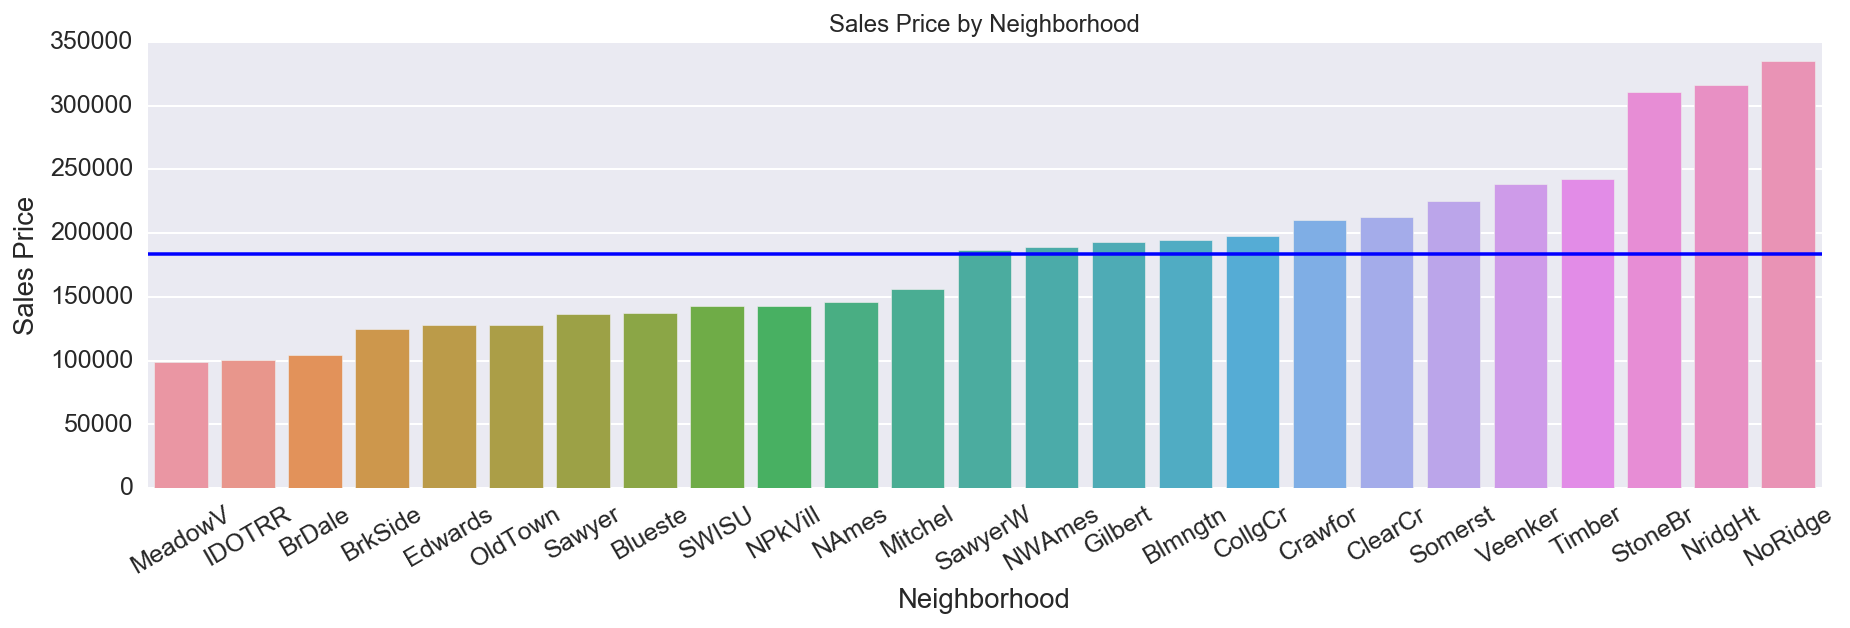

In [58]:
neighbor_price = train_set.groupby('Neighborhood')['SalePrice'].mean().sort_values()

plt.subplots(figsize=(15,4))
sns.barplot(x = neighbor_price.index, y = neighbor_price)
plt.hlines(y = neighbor_price.mean(), xmin = -1, xmax = 25, color = 'blue')
plt.xticks(rotation = 30)
plt.ylabel('Sales Price')
plt.title('Sales Price by Neighborhood', fontsize = 12)
plt.show()

In [59]:
low = ['MeadowV', 'IDOTRR', 'BrDale']
mid_low = ['BrkSide', 'Edwards', 'OldTown', 'Sawyer', 'Blueste', 'SWISU', 'NPkVill', 'NAmes', 'Mitchel']
mid_high = ['SawyerW', 'NWAmes', 'Gilbert', 'Blmngtn', 'CollgCr', 'Crawfor', 'ClearCr', 'Somerst', 'Veenker', 'Timber']
high = ['StoneBr', 'NridgHt', 'NoRidge']

Neighborhood_Ord = combined.Neighborhood.apply(lambda x: 0 if x in low 
                                               else (1 if x in mid_low 
                                                    else (2 if x in mid_high else 3)))

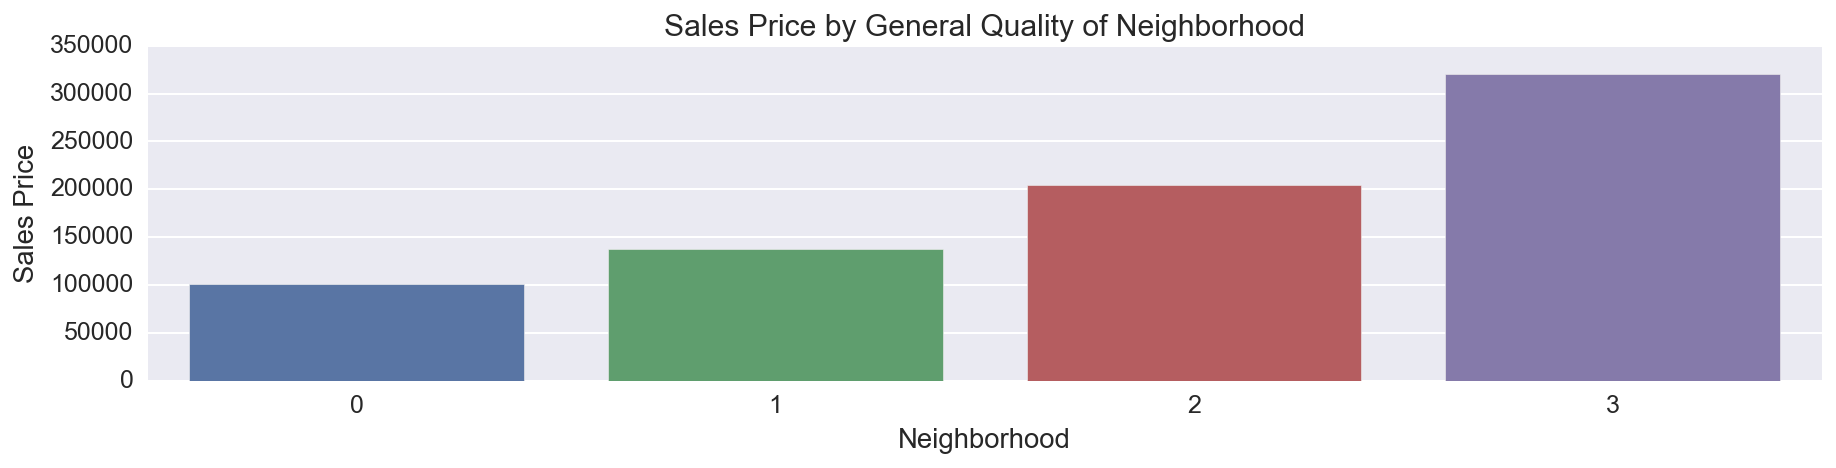

In [60]:
plt.subplots(figsize=(15,3))
sns.barplot(x = Neighborhood_Ord[:ntrain], y = y_train, ci = False)
plt.ylabel('Sales Price')
plt.title('Sales Price by General Quality of Neighborhood', fontsize = 15)
plt.show()

In [61]:
combined.drop('Neighborhood', axis = 1, inplace = True)
combined = pd.concat([combined, Neighborhood_Ord], axis = 1)
combined.rename(columns = {0 : 'NeighborhoodScore'}, inplace = True)

### Pool

In [62]:
print('Out of {} houses in the training set, {} does not have the pool.'.format(len(train_set),sum(train_set.PoolArea == 0)))

Out of 1460 houses in the training set, 1453 does not have the pool.


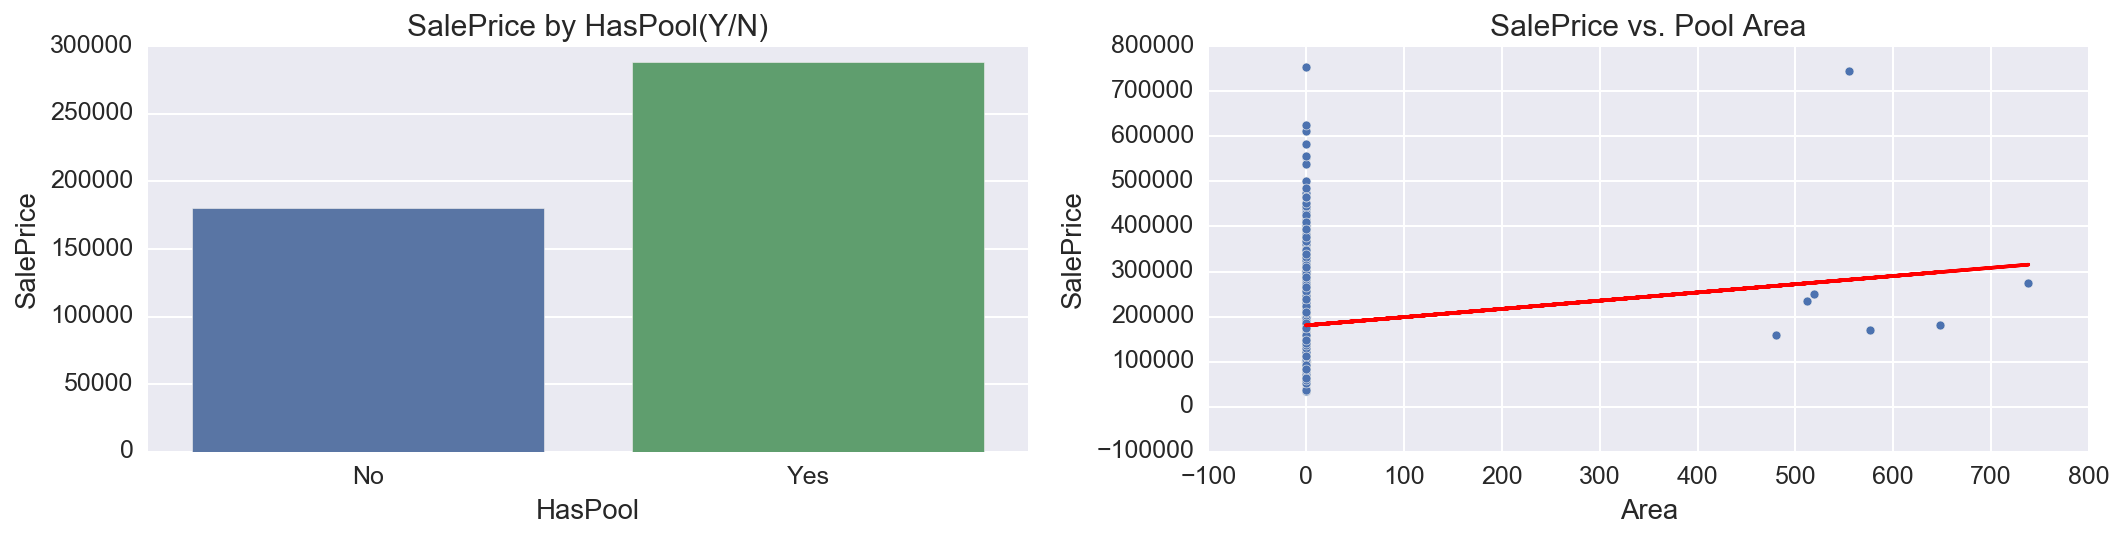

In [63]:
HasPool = train_set.PoolArea.apply(lambda x: 'Yes' if x != 0 else 'No')
fit = np.polyfit(x = train_set.PoolArea, y = y_train, deg = 1)

plt.subplots(figsize = (15,4))
plt.subplot(1,2,1)
sns.barplot(x = HasPool, y = y_train, ci = False)
plt.title('SalePrice by HasPool(Y/N)'); plt.xlabel('HasPool')

plt.subplot(1,2,2)
plt.scatter(x=train_set.PoolArea, y=y_train)
plt.plot(train_set.PoolArea, fit[0] * train_set.PoolArea + fit[1], color='red')
plt.title('SalePrice vs. Pool Area'); plt.xlabel('Area'); plt.ylabel('SalePrice')

plt.tight_layout()
plt.show()

Looking at the righthand scatterplot, I don't think `PoolArea` tell us much about the relationship. But the barplot on the left tells us that the houses with pool generally are priced higher than those without. However, we already have the variable `PoolQC` which indicates whether or not a house has pool and the quality of the pool if it has one. So, we don't need another indicator variable. <br><br> But I am still dropping `PoolArea` from the dataset.

In [64]:
combined.drop('PoolArea', axis = 1, inplace = True)

### Recovering Train and Test set

In [65]:
train_set = combined[:ntrain]
train_set = pd.concat([train_set, y_train], axis = 1)
train_set = pd.concat([train_ID, train_set], axis = 1)
        
test_set = combined[ntrain:].reset_index(drop=True)
test_set = pd.concat([test_ID, test_set], axis = 1)

### Export to .csv file

In [66]:
train_set.to_csv('new_train.csv', index = False)
test_set.to_csv('new_test.csv', index = False)